In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import json # to read credentials

# SQL stuff
#import psycopg2 as ps
#import pandas.io.sql as sqlio
#from sqlalchemy import create_engine
#from sqlalchemy.types import Integer, Text, String, DateTime
#engine = create_engine('sqlite://', echo=False)
#from pyspark.sql.functions import size,col

# TRINO stuff
import trino

# Regex stuff
import re

# PDF stuff
import PyPDF2 as pypdf

# Dates stuff
from datetime import datetime, date, timedelta

# GSheet Stuff
from gspread_pandas import Spread

# Computer Stuff
import os

# Dates stuff
from datetime import datetime, date, timedelta

import pathlib
from mizani.breaks import date_breaks

# Operating system stuff
#import pathlib 

# Plot stuff
import plotnine as pn

# Statistics stuff + DS stuff
from sklearn.metrics import roc_curve, precision_recall_curve

# Statistics Stuff
from statsmodels.stats.proportion import proportion_confint, test_proportions_2indep, proportion_effectsize

pd.set_option('display.max_columns', None)

In [2]:
#import pandas as pd

# Define the file path and chunk size
file_path = '/Users/juan.inclan/Desktop/Python/good_scripts/models_dataset/queried_df.csv'
chunk_size = 100000  # Adjust based on memory capacity

# Step 1: Get the total number of rows in the file
with open(file_path, 'r', encoding='utf-8') as file:
    total_rows = sum(1 for row in file) - 1  # Subtract 1 for the header row

rows_processed = 0
chunks = []

# Step 2: Read the file in chunks
try:
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        # Step 3: Process each chunk (in this case, just store it)
        chunks.append(chunk)
        
        # Update progress
        rows_processed += len(chunk)
        progress_percentage = (rows_processed / total_rows) * 100
        print(f"Processed {rows_processed} rows out of {total_rows} ({progress_percentage:.2f}%)")
except Exception as e:
    print(f"Error reading CSV file: {e}")

# Step 4: Concatenate all chunks into a single DataFrame
queried_df = pd.concat(chunks, ignore_index=True)

# Display the first few rows of the final DataFrame
print(queried_df.head())

/var/folders/4k/58k3mbxd34b4zcc9nfy33qn00000gp/T/ipykernel_62800/1370896899.py:16: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.


Processed 100000 rows out of 1539926 (6.49%)
Processed 200000 rows out of 1539926 (12.99%)


/var/folders/4k/58k3mbxd34b4zcc9nfy33qn00000gp/T/ipykernel_62800/1370896899.py:16: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.


Processed 300000 rows out of 1539926 (19.48%)
Processed 400000 rows out of 1539926 (25.98%)
Processed 500000 rows out of 1539926 (32.47%)
Processed 600000 rows out of 1539926 (38.96%)
Processed 700000 rows out of 1539926 (45.46%)
Processed 800000 rows out of 1539926 (51.95%)


/var/folders/4k/58k3mbxd34b4zcc9nfy33qn00000gp/T/ipykernel_62800/1370896899.py:16: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.


Processed 900000 rows out of 1539926 (58.44%)
Processed 1000000 rows out of 1539926 (64.94%)


/var/folders/4k/58k3mbxd34b4zcc9nfy33qn00000gp/T/ipykernel_62800/1370896899.py:16: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.


Processed 1100000 rows out of 1539926 (71.43%)


/var/folders/4k/58k3mbxd34b4zcc9nfy33qn00000gp/T/ipykernel_62800/1370896899.py:16: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.


Processed 1200000 rows out of 1539926 (77.93%)
Processed 1300000 rows out of 1539926 (84.42%)
Processed 1400000 rows out of 1539926 (90.91%)
Processed 1500000 rows out of 1539926 (97.41%)
Processed 1539926 rows out of 1539926 (100.00%)
       order_id creation_time  customer_id  \
0  1.007329e+11    2024-07-13       538008   
1  1.007329e+11    2024-07-13      1122936   
2  1.007323e+11    2024-07-13      2057868   
3  1.007329e+11    2024-07-13      2058044   
4  1.007321e+11    2024-07-13      2717598   

                            checkout_id  order_laterattempts  ravelin_score  \
0  35438c7c-20b4-4560-a01f-c039aa7a7daa                    0           19.0   
1  b6d3183a-af91-49cb-af25-2da5505abc41                    0           11.0   
2  9f52586d-aa77-4d56-91d3-d2283f6a0afc                    0           32.0   
3  bdd14998-8d92-4647-83f2-d938f4ac918d                    0           45.0   
4  28f43a7a-279a-4788-be88-dc4c10923bf3                    0           25.0   

   ml_uch_sc

In [3]:
#import pandas as pd

# Define the file path and chunk size
file_path = '/Users/juan.inclan/Desktop/Python/good_scripts/models_dataset/scores_df.csv'
chunk_size = 100000  # Adjust based on memory capacity

# Step 1: Get the total number of rows in the file
with open(file_path, 'r', encoding='utf-8') as file:
    total_rows = sum(1 for row in file) - 1  # Subtract 1 for the header row

rows_processed = 0
chunks = []

# Step 2: Read the file in chunks
try:
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        # Step 3: Process each chunk (in this case, just store it)
        chunks.append(chunk)
        
        # Update progress
        rows_processed += len(chunk)
        progress_percentage = (rows_processed / total_rows) * 100
        print(f"Processed {rows_processed} rows out of {total_rows} ({progress_percentage:.2f}%)")
except Exception as e:
    print(f"Error reading CSV file: {e}")

# Step 4: Concatenate all chunks into a single DataFrame
scores_df = pd.concat(chunks, ignore_index=True)

# Display the first few rows of the final DataFrame
print(scores_df.head())

Processed 100000 rows out of 1528383 (6.54%)
Processed 200000 rows out of 1528383 (13.09%)
Processed 300000 rows out of 1528383 (19.63%)
Processed 400000 rows out of 1528383 (26.17%)
Processed 500000 rows out of 1528383 (32.71%)
Processed 600000 rows out of 1528383 (39.26%)
Processed 700000 rows out of 1528383 (45.80%)
Processed 800000 rows out of 1528383 (52.34%)
Processed 900000 rows out of 1528383 (58.89%)
Processed 1000000 rows out of 1528383 (65.43%)
Processed 1100000 rows out of 1528383 (71.97%)
Processed 1200000 rows out of 1528383 (78.51%)
Processed 1300000 rows out of 1528383 (85.06%)
Processed 1400000 rows out of 1528383 (91.60%)
Processed 1500000 rows out of 1528383 (98.14%)
Processed 1528383 rows out of 1528383 (100.00%)
                            checkout_id  score
0  35438c7c-20b4-4560-a01f-c039aa7a7daa      0
1  b6d3183a-af91-49cb-af25-2da5505abc41      0
2  9f52586d-aa77-4d56-91d3-d2283f6a0afc      0
3  bdd14998-8d92-4647-83f2-d938f4ac918d      0
4  28f43a7a-279a-4788-

In [4]:
#import pandas as pd

# Define the file path and chunk size
file_path = '/Users/juan.inclan/Desktop/Python/good_scripts/models_dataset/scores_prod_df.csv'
chunk_size = 100000  # Adjust based on memory capacity

# Step 1: Get the total number of rows in the file
with open(file_path, 'r', encoding='utf-8') as file:
    total_rows = sum(1 for row in file) - 1  # Subtract 1 for the header row

rows_processed = 0
chunks = []

# Step 2: Read the file in chunks
try:
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        # Step 3: Process each chunk (in this case, just store it)
        chunks.append(chunk)
        
        # Update progress
        rows_processed += len(chunk)
        progress_percentage = (rows_processed / total_rows) * 100
        print(f"Processed {rows_processed} rows out of {total_rows} ({progress_percentage:.2f}%)")
except Exception as e:
    print(f"Error reading CSV file: {e}")

# Step 4: Concatenate all chunks into a single DataFrame
scores_prod_df = pd.concat(chunks, ignore_index=True)

# Display the first few rows of the final DataFrame
print(scores_prod_df.head())

Processed 100000 rows out of 1528383 (6.54%)
Processed 200000 rows out of 1528383 (13.09%)
Processed 300000 rows out of 1528383 (19.63%)
Processed 400000 rows out of 1528383 (26.17%)
Processed 500000 rows out of 1528383 (32.71%)
Processed 600000 rows out of 1528383 (39.26%)
Processed 700000 rows out of 1528383 (45.80%)
Processed 800000 rows out of 1528383 (52.34%)
Processed 900000 rows out of 1528383 (58.89%)
Processed 1000000 rows out of 1528383 (65.43%)
Processed 1100000 rows out of 1528383 (71.97%)
Processed 1200000 rows out of 1528383 (78.51%)
Processed 1300000 rows out of 1528383 (85.06%)
Processed 1400000 rows out of 1528383 (91.60%)
Processed 1500000 rows out of 1528383 (98.14%)
Processed 1528383 rows out of 1528383 (100.00%)
                            checkout_id  score
0  35438c7c-20b4-4560-a01f-c039aa7a7daa      0
1  b6d3183a-af91-49cb-af25-2da5505abc41      0
2  9f52586d-aa77-4d56-91d3-d2283f6a0afc      0
3  bdd14998-8d92-4647-83f2-d938f4ac918d      0
4  28f43a7a-279a-4788-

# Function definitions

In [66]:
def plot_roc_curve(df, preds_col=None, label_col=None):

    if preds_col == None:
        preds_col = "captcha_score"

    if label_col == None:
        label_col = "captcha_score"

    # Create the ROC curve
    fpr, tpr, thresholds = roc_curve(df[label_col], df[preds_col])

    # Plot the ROC curve
    df_fpr_tpr = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':thresholds})

# Create the data viz
    print(f"Thresholds: {thresholds}")
    return (
        pn.ggplot(data = df_fpr_tpr)+
        pn.geom_point(
            pn.aes(
                x = 'FPR',
                y = 'TPR',
                size='Threshold',
                color='Threshold'
            )
        ) +
        pn.geom_line(
            pn.aes(
                x = 'FPR',
                y = 'TPR'
            )
        ) +
        pn.labs(title = 'ROC Curve')+
        pn.xlab('False Positive Rate')+
        pn.ylab('True Positive Rate')+
        pn.theme_minimal()
    )

In [60]:
def plot_precision_recall(df, preds_col=None, label_col=None):

    if preds_col == None:
        preds_col = "captcha_score"
        
    if label_col == None:
        label_col = "captcha_score"

    # Create the Precision-Recall curve
    precision, recall, thresholds = precision_recall_curve(df[label_col], df[preds_col])

    # Plot the ROC curve
    df_recall_precision = pd.DataFrame({
        'Precision':precision[:-1],
        'Recall':recall[:-1],
        'Threshold':thresholds
    })

# Creat a data viz
    return(
        pn.ggplot(data = df_recall_precision) +
        pn.geom_point(
            pn.aes(
                x = 'Recall',
                y = 'Precision',
                size='Threshold'
            )
        ) +
        pn.geom_line(
            pn.aes(
                x = 'Recall',
                y = 'Precision'
            )
        )+
        pn.labs(title = 'Recall Precision Curve')+
        pn.xlab('Recall')+
        pn.ylab('Precision')+
        pn.theme_minimal()
    )

# EDA

In [7]:
queried_df.dtypes

order_id                 float64
creation_time             object
customer_id                int64
checkout_id               object
order_laterattempts        int64
                          ...   
is_liveops_blocked          bool
is_riskengine_blocked       bool
has_debt_paid               bool
forgiven                    bool
p_creation_date           object
Length: 61, dtype: object

In [8]:
queried_df['order_id']=queried_df['order_id'].apply(lambda x: f"{x:.6f}".rstrip('0').rstrip('.'))

In [9]:
#queried_df.dtypes

In [10]:
len(queried_df)

1539926

In [11]:
len(scores_df)

1528383

In [12]:
len(scores_prod_df)

1528383

In [13]:
len(queried_df.checkout_id)

1539926

In [14]:
len(queried_df.checkout_id.unique())

1530467

In [15]:
len(queried_df.order_id)

1539926

In [16]:
len(queried_df.order_id.unique())

1884

We may have some duplicate rows in df due to checkout_id, we will check if it is necessesaty to clean them, we are not going to use order_id, because it is not correctly allocated and it is incorrect

In [17]:
queried_df[queried_df['checkout_id'].duplicated(keep=False)]

,order_id,creation_time,customer_id,checkout_id,order_laterattempts,ravelin_score,ml_uch_score,order_city,order_country,order_amount_amountmajor,order_amountineur,order_type,store_partner,store_id,store_categoryid,customer_debttotalineur,customer_orderscount,customer_finishedorderscount,customer_deliveredorderscount,customer_orderscountinlast90days,device_type,customer_accountageinseconds,order_pickuppoint_h3addressresolution9,order_deliverypoint_h3addressresolution9,order_pickuppoint_latitude,order_deliverypoint_latitude,order_pickuppoint_longitude,order_deliverypoint_longitude,graph_size_0,graph_size_30,count_card_0,count_mgm_0,countphone,countcard,refunded_orders_count,orders_count_in_last_30_days,missing_or_mistaken_order_feedbacks_in_last_90_days,failed_promo_code_insertions_in_last_30_days,failed_promo_code_insertions_in_last_7_days,failed_promo_code_insertions_all_time,approved_promo_code_insertions_in_last_30_days,approved_promo_code_insertions_in_last_7_days,approved_promo_code_insertions_all_time,phone_customers_count,average_basket_size_in_eur_in_last_90_days,is_prime,phone_spend_amount_last_7_days,phone_spend_amount_last_30_days,phone_spend_amount_last_90_days,phone_orders_count_in_last_7_days,phone_orders_count_in_last_30_days,phone_orders_count_in_last_90_days,payment_status,final_status,cancel_reason,unpaid_gtv_eur,is_liveops_blocked,is_riskengine_blocked,has_debt_paid,forgiven,p_creation_date
475,100731404000,2024-07-13,123502843,8eaf58b3-db55-44f6-9247-b334c2eebf09,0,41.0,NaN,Island - Lagos,NG,6974.00,4.540074,STORE,True,315059.0,4.0,2.09,217,217,205,44,Mobile,67576723,89589c8a38bffff,89589c81273ffff,6.425824,6.451266,3.475589,3.494956,4.0,3.0,2.0,0.0,1.0,2.0,3,7,1,0,0,NaN,0,0,NaN,1.0,40700,False,0,1858,17612,0,7,44,PAID,DeliveredStatus,NaN,0.000000,False,False,True,False,2024-07-13
476,100731404000,2024-07-13,123502843,8eaf58b3-db55-44f6-9247-b334c2eebf09,1,41.0,NaN,Island - Lagos,NG,6974.00,4.540074,STORE,True,315059.0,4.0,2.09,217,217,205,44,Mobile,67576723,89589c8a38bffff,89589c81273ffff,6.425824,6.451266,3.475589,3.494956,4.0,3.0,2.0,0.0,1.0,2.0,3,7,1,0,0,NaN,0,0,NaN,1.0,40700,False,0,1858,17612,0,7,44,PAID,DeliveredStatus,NaN,0.000000,False,False,True,False,2024-07-13
477,100731404000,2024-07-13,123502843,8eaf58b3-db55-44f6-9247-b334c2eebf09,2,41.0,NaN,Island - Lagos,NG,6974.00,4.540074,STORE,True,315059.0,4.0,2.09,217,217,205,44,Mobile,67576723,89589c8a38bffff,89589c81273ffff,6.425824,6.451266,3.475589,3.494956,4.0,3.0,2.0,0.0,1.0,2.0,3,7,1,0,0,NaN,0,0,NaN,1.0,40700,False,0,1858,17612,0,7,44,PAID,DeliveredStatus,NaN,0.000000,False,False,True,False,2024-07-13
573,100733100000,2024-07-13,134997453,050c474a-725d-462d-aa3e-2445f2879603,0,20.0,NaN,Valencia,ES,47.03,47.030000,STORE,True,14222.0,1.0,20.44,42,41,40,24,Mobile,53687592,89395401a27ffff,8939540f413ffff,39.475452,39.462486,-0.333185,-0.333294,5.0,3.0,0.0,0.0,0.0,0.0,0,4,0,0,0,NaN,0,0,NaN,1.0,228800,False,0,8989,51689,0,4,24,PAID,DeliveredStatus,NaN,0.000000,False,False,True,False,2024-07-13
574,100733100000,2024-07-13,134997453,050c474a-725d-462d-aa3e-2445f2879603,1,20.0,NaN,Valencia,ES,47.03,47.030000,STORE,True,14222.0,1.0,20.44,42,41,40,24,Mobile,53687592,89395401a27ffff,8939540f413ffff,39.475452,39.462486,-0.333185,-0.333294,5.0,3.0,0.0,0.0,0.0,0.0,0,4,0,0,0,NaN,0,0,NaN,1.0,228800,False,0,8989,51689,0,4,24,PAID,DeliveredStatus,NaN,0.000000,False,False,True,False,2024-07-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537635,100733180000,2024-07-14,133332907,83a38103-8f3f-45f9-b9ce-8a29ad3fd6c4,1,61.0,NaN,Casablanca,MA,215.58,20.172036,STORE,True,292874.0,1.0,13.69,4,3,2,0,Browser,56090769,8939aab9e83ffff,8939aab9167ffff,33.570625,33.573980,-7.560818,-7.568080,5.0,3.0,0.0,0.0,1.0,0.0,0,0,0,0,0,NaN,0,0,NaN,1.0,0,False,0,0,0,0,0,0,NOT_PAID,Canceled

In [18]:
no_dup_df=queried_df.drop_duplicates(subset='checkout_id').reset_index(drop=True)

In [19]:
# JOINING SCORES AND INPUTING NA, DUE TO IF RISK ENGINE FAILS TO CHECK, IT ALLOWS THE ORDER AND CHANGE DTYOE TO INTEGER
no_dup_df= pd.merge(no_dup_df, scores_prod_df, on='checkout_id', how='left')
no_dup_df.rename(columns={'score': 'production_score'}, inplace=True)
no_dup_df= pd.merge(no_dup_df, scores_df, on='checkout_id', how='left')
no_dup_df.rename(columns={'score': 'shadowing_score'}, inplace=True)

no_dup_df.rename(columns={'creation_time': 'creation_date'}, inplace=True)
no_dup_df['creation_date']=pd.to_datetime(no_dup_df['creation_date'])

no_dup_df.production_score=no_dup_df.production_score.fillna(0)
no_dup_df.shadowing_score=no_dup_df.shadowing_score.fillna(0)
no_dup_df.production_score=no_dup_df.production_score.astype(int)
no_dup_df.shadowing_score=no_dup_df.shadowing_score.astype(int)

In [20]:
no_dup_df['payment_status'].dtype

dtype('O')

In [21]:
no_dup_df.payment_status.isna().sum()

0

In [22]:
no_dup_df

,order_id,creation_date,customer_id,checkout_id,order_laterattempts,ravelin_score,ml_uch_score,order_city,order_country,order_amount_amountmajor,order_amountineur,order_type,store_partner,store_id,store_categoryid,customer_debttotalineur,customer_orderscount,customer_finishedorderscount,customer_deliveredorderscount,customer_orderscountinlast90days,device_type,customer_accountageinseconds,order_pickuppoint_h3addressresolution9,order_deliverypoint_h3addressresolution9,order_pickuppoint_latitude,order_deliverypoint_latitude,order_pickuppoint_longitude,order_deliverypoint_longitude,graph_size_0,graph_size_30,count_card_0,count_mgm_0,countphone,countcard,refunded_orders_count,orders_count_in_last_30_days,missing_or_mistaken_order_feedbacks_in_last_90_days,failed_promo_code_insertions_in_last_30_days,failed_promo_code_insertions_in_last_7_days,failed_promo_code_insertions_all_time,approved_promo_code_insertions_in_last_30_days,approved_promo_code_insertions_in_last_7_days,approved_promo_code_insertions_all_time,phone_customers_count,average_basket_size_in_eur_in_last_90_days,is_prime,phone_spend_amount_last_7_days,phone_spend_amount_last_30_days,phone_spend_amount_last_90_days,phone_orders_count_in_last_7_days,phone_orders_count_in_last_30_days,phone_orders_count_in_last_90_days,payment_status,final_status,cancel_reason,unpaid_gtv_eur,is_liveops_blocked,is_riskengine_blocked,has_debt_paid,forgiven,p_creation_date,production_score,shadowing_score
0,100732944000,2024-07-13,538008,35438c7c-20b4-4560-a01f-c039aa7a7daa,0,19.0,0.0,Mazarrón,ES,19.87,19.870000,STORE,True,93870.0,1.0,0.0,86,86,61,12,Mobile,224392359,893825152b3ffff,89382515247ffff,37.573254,37.560220,-1.270463,-1.274952,6.0,6.0,1.0,0.0,1.0,1.0,2,0,0,0,0,NaN,0,0,NaN,1.0,238500,False,0,0,18908,0,0,11,PAID,DeliveredStatus,NaN,0.00,False,False,True,False,2024-07-13,0,0
1,100732910000,2024-07-13,1122936,b6d3183a-af91-49cb-af25-2da5505abc41,0,11.0,0.0,Palma,ES,34.09,34.090000,STORE,True,6525.0,1.0,0.0,202,198,195,11,Mobile,210383952,893942642a3ffff,89394264067ffff,39.573853,39.581920,2.657114,2.667508,6.0,5.0,2.0,0.0,1.0,2.0,5,4,1,0,0,NaN,0,0,NaN,1.0,309300,True,9029,12308,33719,3,4,11,PAID,DeliveredStatus,NaN,0.00,False,False,True,False,2024-07-13,0,0
2,100732300000,2024-07-13,2057868,9f52586d-aa77-4d56-91d3-d2283f6a0afc,0,32.0,0.0,Sofia,BG,55.02,28.089636,STORE,True,147261.0,1.0,0.0,11,11,11,1,Mobile,199750040,891ec465873ffff,891ec09b0cfffff,42.698128,42.644950,23.332258,23.336962,4.0,4.0,0.0,0.0,0.0,0.0,2,1,0,0,0,NaN,0,0,NaN,1.0,137700,False,0,1277,1277,0,1,1,PAID,DeliveredStatus,NaN,0.00,False,False,True,False,2024-07-13,0,0
3,100732940000,2024-07-13,2058044,bdd14998-8d92-4647-83f2-d938f4ac918d,0,45.0,0.0,Benidorm - Altea,ES,40.72,40.720000,STORE,True,47901.0,1.0,0.0,213,193,193,11,Mobile,199760702,89395626dc7ffff,89395626c37ffff,38.543490,38.538530,-0.102024,-0.111834,23.0,23.0,5.0,0.0,2.0,5.0,5,6,0,0,0,NaN,0,0,NaN,1.0,378900,False,2649,21960,39724,1,6,11,PAID,DeliveredStatus,NaN,0.00,False,False,True,False,2024-07-13,0,0
4,100732060000,2024-07-13,2717598,28f43a7a-279a-4788-be88-dc4c10923bf3,0,25.0,0.0,Valladolid,ES,49.96,49.960000,STORE,True,12104.0,4.0,0.0,313,312,300,43,Mobile,195507783,89392842bcfffff,89392842bc7ffff,41.647606,41.649590,-4.710169,-4.708449,14.0,7.0,4.0,0.0,1.0,4.0,11,15,1,0,0,NaN,0,0,NaN,1.0,321800,False,16519,43923,130306,6,15,43,NOT_PAID,DeliveredStatus,NaN,-49.96,False,False,False,False,2024-07-13,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1532913,100735510000,2024-07-14,173290281,0a2d9a65-92e2-4fcb-a869-70d29e1a1d52,0,32.0,0.0,Aguadulce,ES,18.48,18.480000,STORE,True,164437.0,1.0,0.0,0,0,0,0,Mobile,1507,89382479883ffff,89382479c7bffff,36.816486,36.815850,-2.562031,-2.574612,2.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,NaN,0,0,NaN,1.0,0,False,0,0,0,0

# Payment distribution

In [23]:
orders = no_dup_df[no_dup_df['production_score'].notna()][['creation_date', 'payment_status']].groupby(
    ['payment_status', pd.Grouper(key='creation_date', freq='1D')]
    ).agg(
        counts = ('creation_date', 'count')
    ).reset_index()

In [24]:
orders['payment_status'] = orders['payment_status'].astype('category')

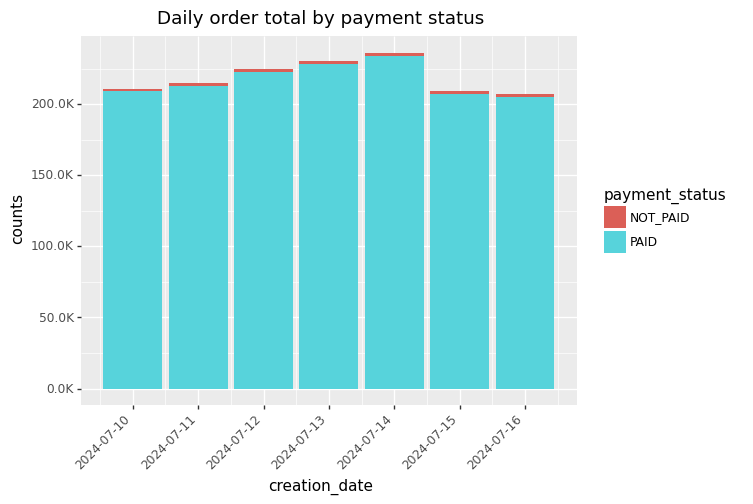

<ggplot: (398498849)>

In [25]:
# Daily Captcha calls without null score plot
(
    pn.ggplot(orders.reset_index(), pn.aes(x='creation_date', y='counts', fill='payment_status')) +
    pn.geom_col() +
    pn.ggtitle('Daily order total by payment status') + 
    pn.scale_y_continuous(labels=lambda l: ['{:.1f}K'.format(v / 1000) for v in l]) +
    pn.theme(axis_text_x=pn.element_text(rotation=45, hjust=1)) 
    #+
    #pn.scale_fill_manual(values=['red', 'blue'])
)

# Production Score distribution

In [26]:
production_score=no_dup_df.groupby(
        ['production_score','payment_status'],
        as_index=False
    ).agg(
        counts=('production_score', 'count')
    ).reset_index()

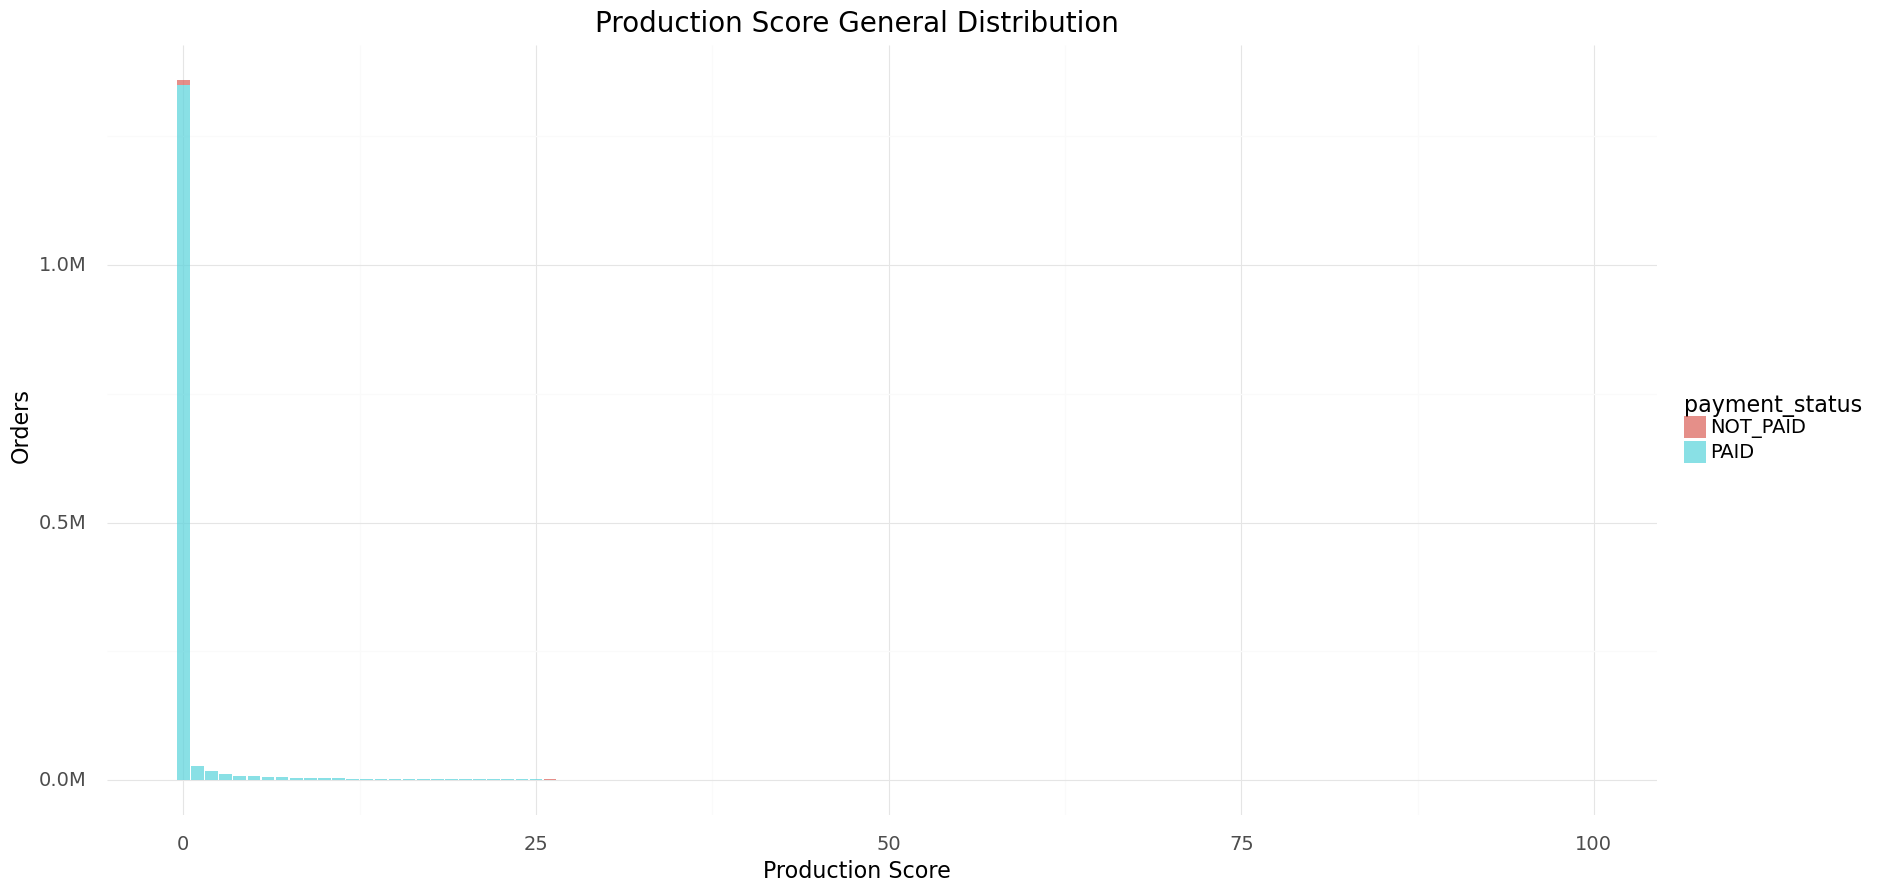

<ggplot: (715943465)>

In [27]:
(pn.ggplot(production_score) +
    pn.geom_bar(pn.aes(x='production_score', y='counts', fill="payment_status"), stat="identity", alpha=0.7) +
    pn.scale_y_continuous(name="Orders", labels=lambda l: ['{:.1f}M'.format(v / 1000000) for v in l]) +
    pn.scale_x_continuous(name="Production Score"#,
                         # breaks=range(int(final_df['MAX_ordersCount'].min()), int(final_df['MAX_ordersCount'].max()) + 1, 1),  # Adjust the range and step as needed
                          #labels=lambda l: ['{:.0f}'.format(v) for v in l]  # Optional formatting for x-axis labels
    ) +
    pn.theme_minimal() +
    pn.labs(title="Production Score General Distribution")+
    pn.theme(figure_size=(20, 10),  # Adjust figure size as needed
         # Adjusting title and labels size
          title=pn.element_text(size=20),  # Adjust title size
          axis_title=pn.element_text(size=16),  # Adjust axis titles size
          axis_text=pn.element_text(size=14),  # Adjust axis labels size
         # Adjusting legend title and text size
          legend_title=pn.element_text(size=16),  # Adjust legend title size
          legend_text=pn.element_text(size=14))  # Adjust legend text size
)

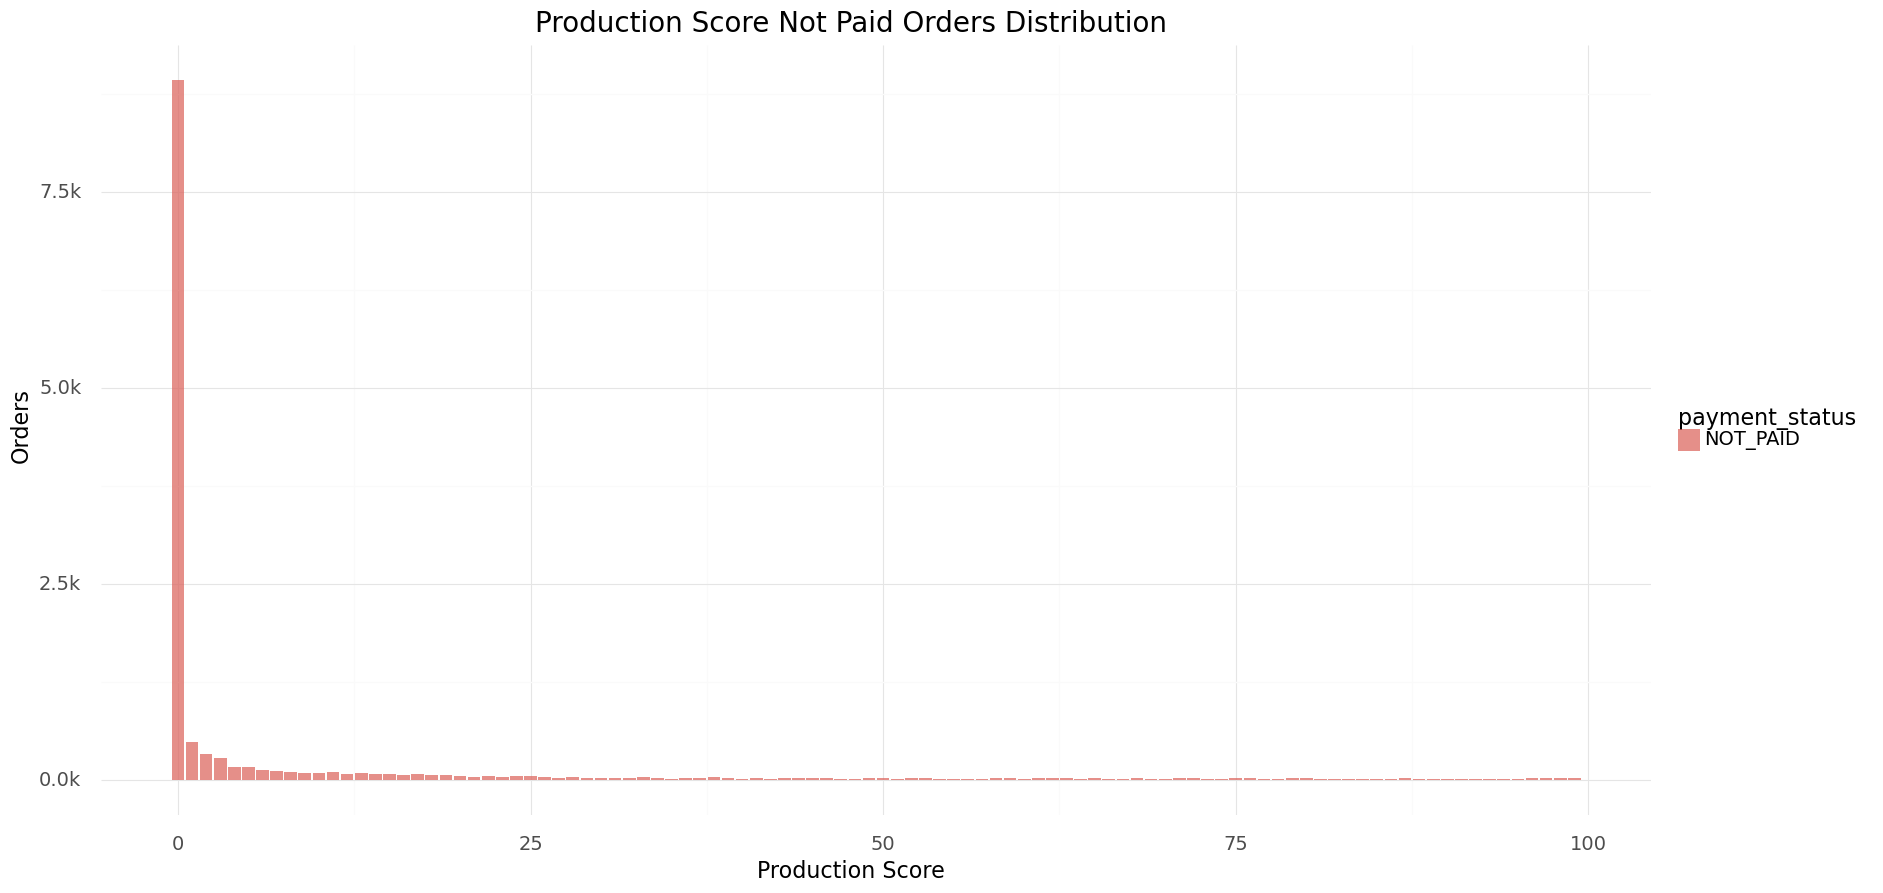

<ggplot: (724592929)>

In [28]:
(pn.ggplot(production_score.query('payment_status=="NOT_PAID"').reset_index(drop=True)) +
    pn.geom_bar(pn.aes(x='production_score', y='counts', fill="payment_status"), stat="identity", alpha=0.7) +
    pn.scale_y_continuous(name="Orders", labels=lambda l: ['{:.1f}k'.format(v / 1000) for v in l]) +
    pn.scale_x_continuous(name="Production Score"#,
                         # breaks=range(int(final_df['MAX_ordersCount'].min()), int(final_df['MAX_ordersCount'].max()) + 1, 1),  # Adjust the range and step as needed
                          #labels=lambda l: ['{:.0f}'.format(v) for v in l]  # Optional formatting for x-axis labels
    ) +
    pn.theme_minimal() +
    pn.labs(title="Production Score Not Paid Orders Distribution")+
    pn.theme(figure_size=(20, 10),  # Adjust figure size as needed
         # Adjusting title and labels size
          title=pn.element_text(size=20),  # Adjust title size
          axis_title=pn.element_text(size=16),  # Adjust axis titles size
          axis_text=pn.element_text(size=14),  # Adjust axis labels size
         # Adjusting legend title and text size
          legend_title=pn.element_text(size=16),  # Adjust legend title size
          legend_text=pn.element_text(size=14))  # Adjust legend text size
)

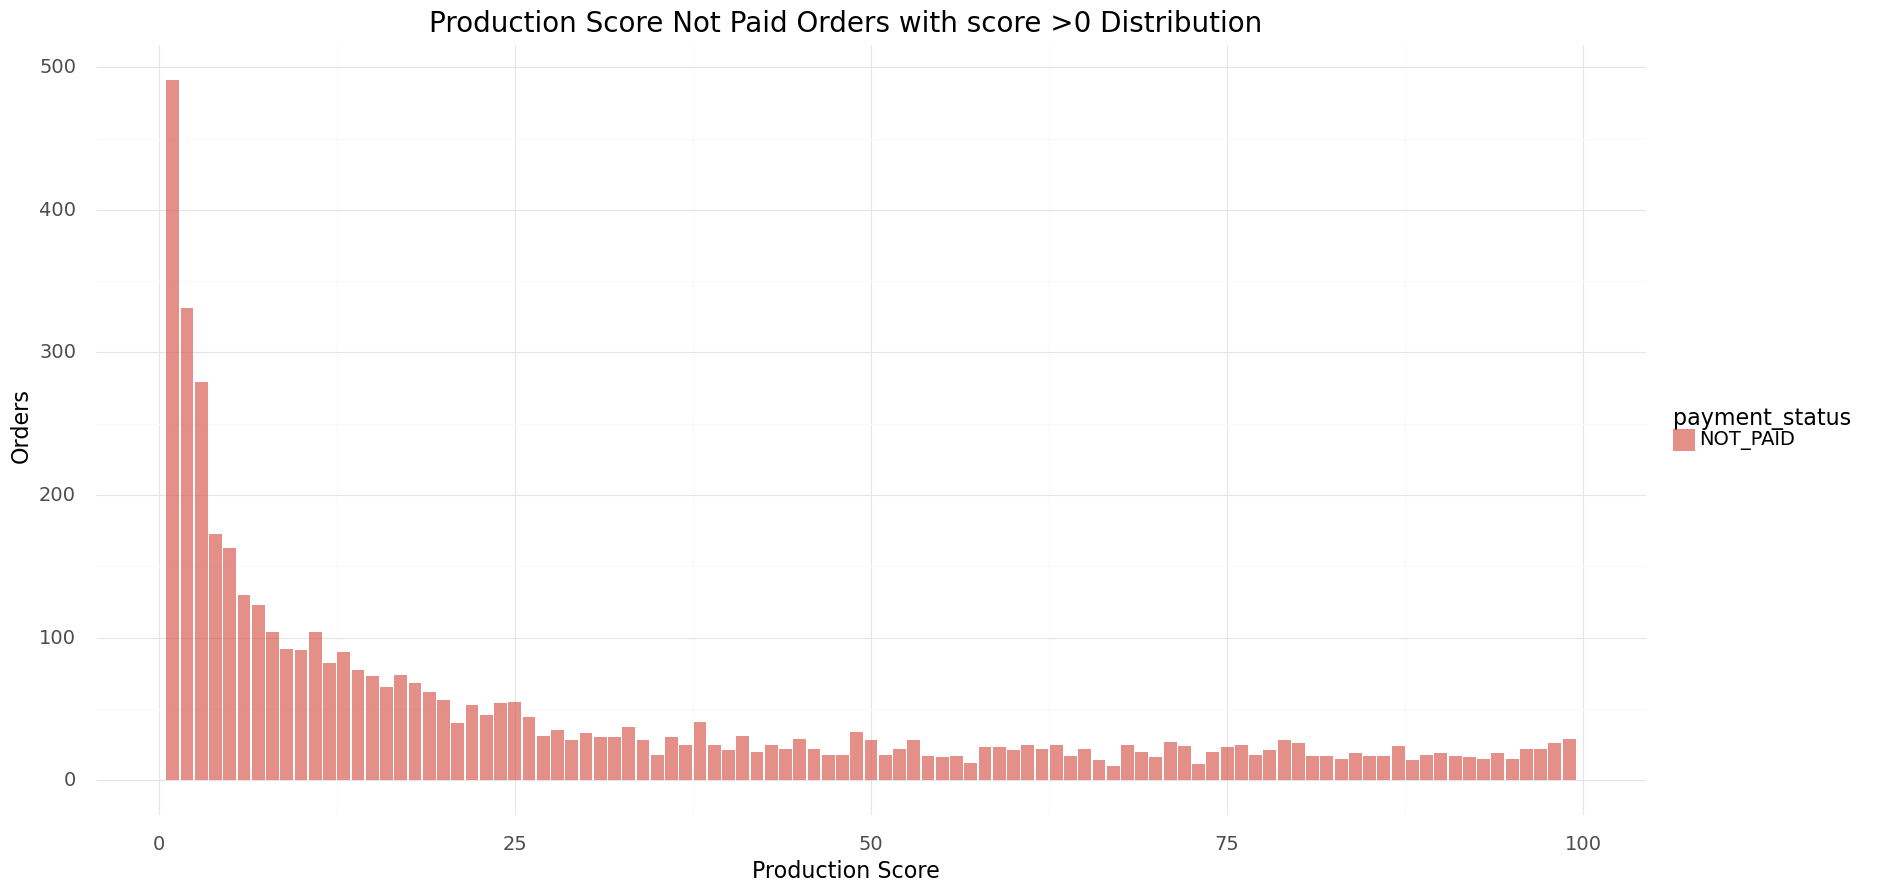

<ggplot: (399344465)>

In [29]:
(pn.ggplot(production_score.query('payment_status=="NOT_PAID" & production_score>0').reset_index(drop=True)) +
    pn.geom_bar(pn.aes(x='production_score', y='counts', fill="payment_status"), stat="identity", alpha=0.7) +
    pn.scale_y_continuous(name="Orders"#, labels=lambda l: ['{:.1f}k'.format(v / 1000) for v in l]
                         ) +
    pn.scale_x_continuous(name="Production Score"#,
                         # breaks=range(int(final_df['MAX_ordersCount'].min()), int(final_df['MAX_ordersCount'].max()) + 1, 1),  # Adjust the range and step as needed
                          #labels=lambda l: ['{:.0f}'.format(v) for v in l]  # Optional formatting for x-axis labels
    ) +
    pn.theme_minimal() +
    pn.labs(title="Production Score Not Paid Orders with score >0 Distribution")+
    pn.theme(figure_size=(20, 10),  # Adjust figure size as needed
         # Adjusting title and labels size
          title=pn.element_text(size=20),  # Adjust title size
          axis_title=pn.element_text(size=16),  # Adjust axis titles size
          axis_text=pn.element_text(size=14),  # Adjust axis labels size
         # Adjusting legend title and text size
          legend_title=pn.element_text(size=16),  # Adjust legend title size
          legend_text=pn.element_text(size=14))  # Adjust legend text size
)

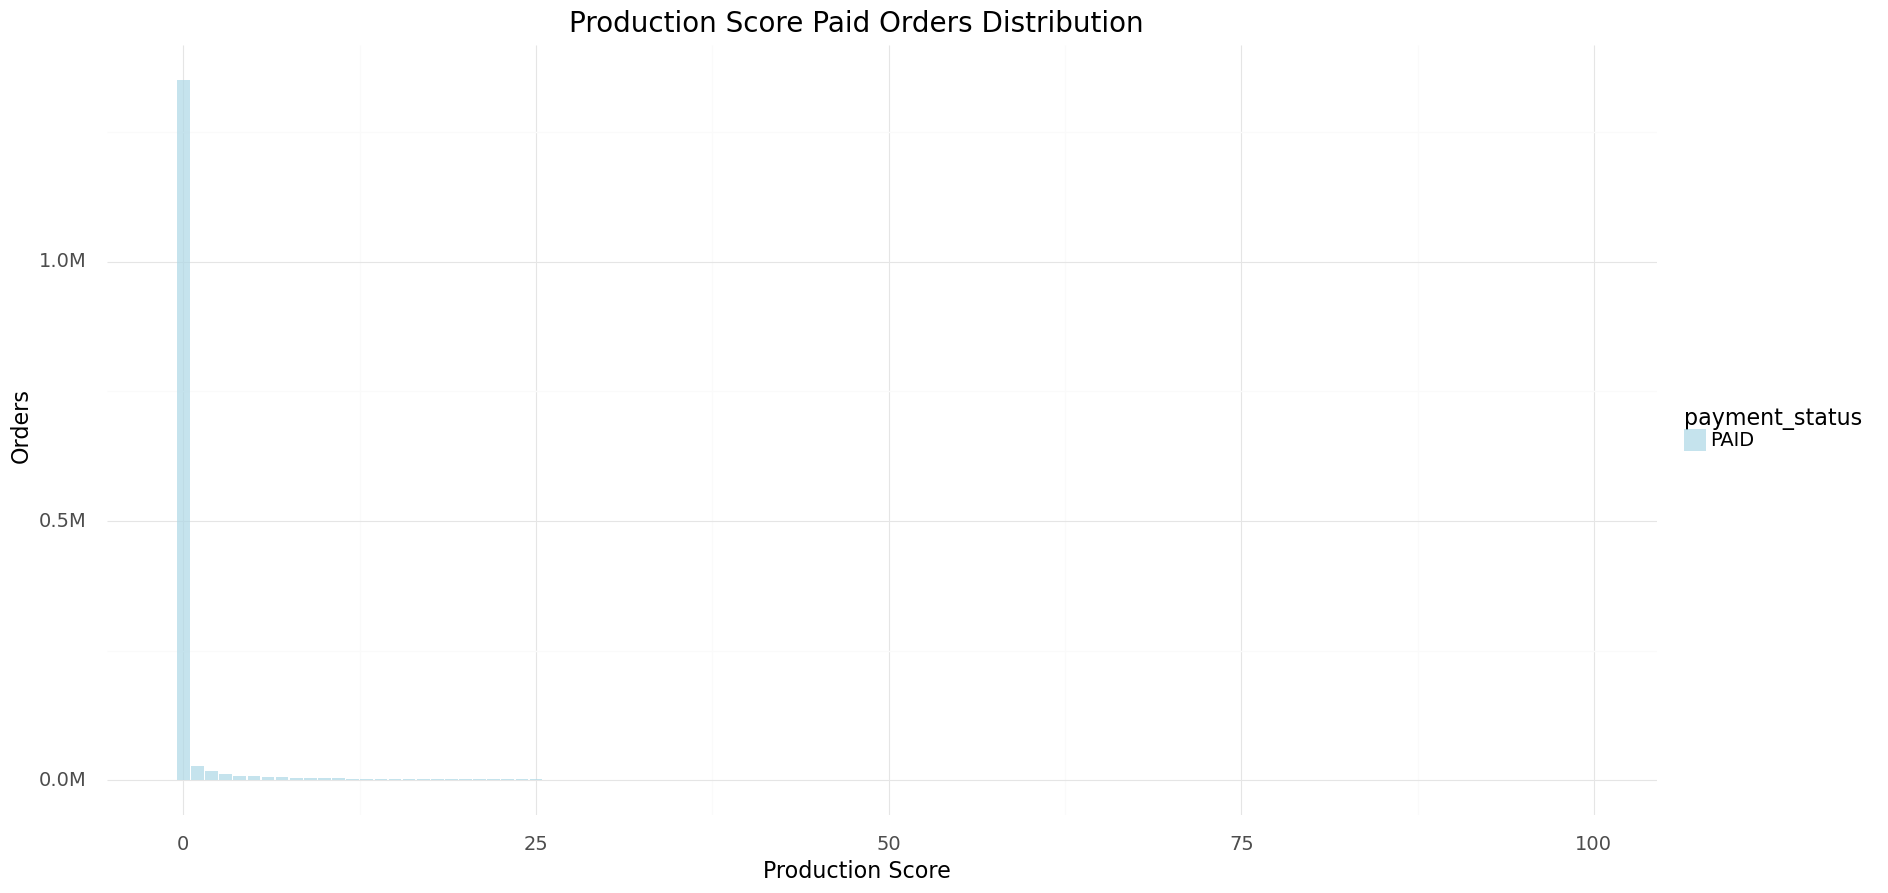

<ggplot: (399408529)>

In [30]:
(pn.ggplot(production_score.query('payment_status=="PAID"').reset_index(drop=True)) +
    pn.geom_bar(pn.aes(x='production_score', y='counts', fill="payment_status"), stat="identity", alpha=0.7) +
    pn.scale_y_continuous(name="Orders", labels=lambda l: ['{:.1f}M'.format(v / 1000000) for v in l]) +
    pn.scale_fill_manual(values={"PAID": "lightblue"}) + 
    pn.scale_x_continuous(name="Production Score"#,
                         # breaks=range(int(final_df['MAX_ordersCount'].min()), int(final_df['MAX_ordersCount'].max()) + 1, 1),  # Adjust the range and step as needed
                          #labels=lambda l: ['{:.0f}'.format(v) for v in l]  # Optional formatting for x-axis labels
    ) +
    pn.theme_minimal() +
    pn.labs(title="Production Score Paid Orders Distribution")+
    pn.theme(figure_size=(20, 10),  # Adjust figure size as needed
         # Adjusting title and labels size
          title=pn.element_text(size=20),  # Adjust title size
          axis_title=pn.element_text(size=16),  # Adjust axis titles size
          axis_text=pn.element_text(size=14),  # Adjust axis labels size
         # Adjusting legend title and text size
          legend_title=pn.element_text(size=16),  # Adjust legend title size
          legend_text=pn.element_text(size=14))  # Adjust legend text size
)

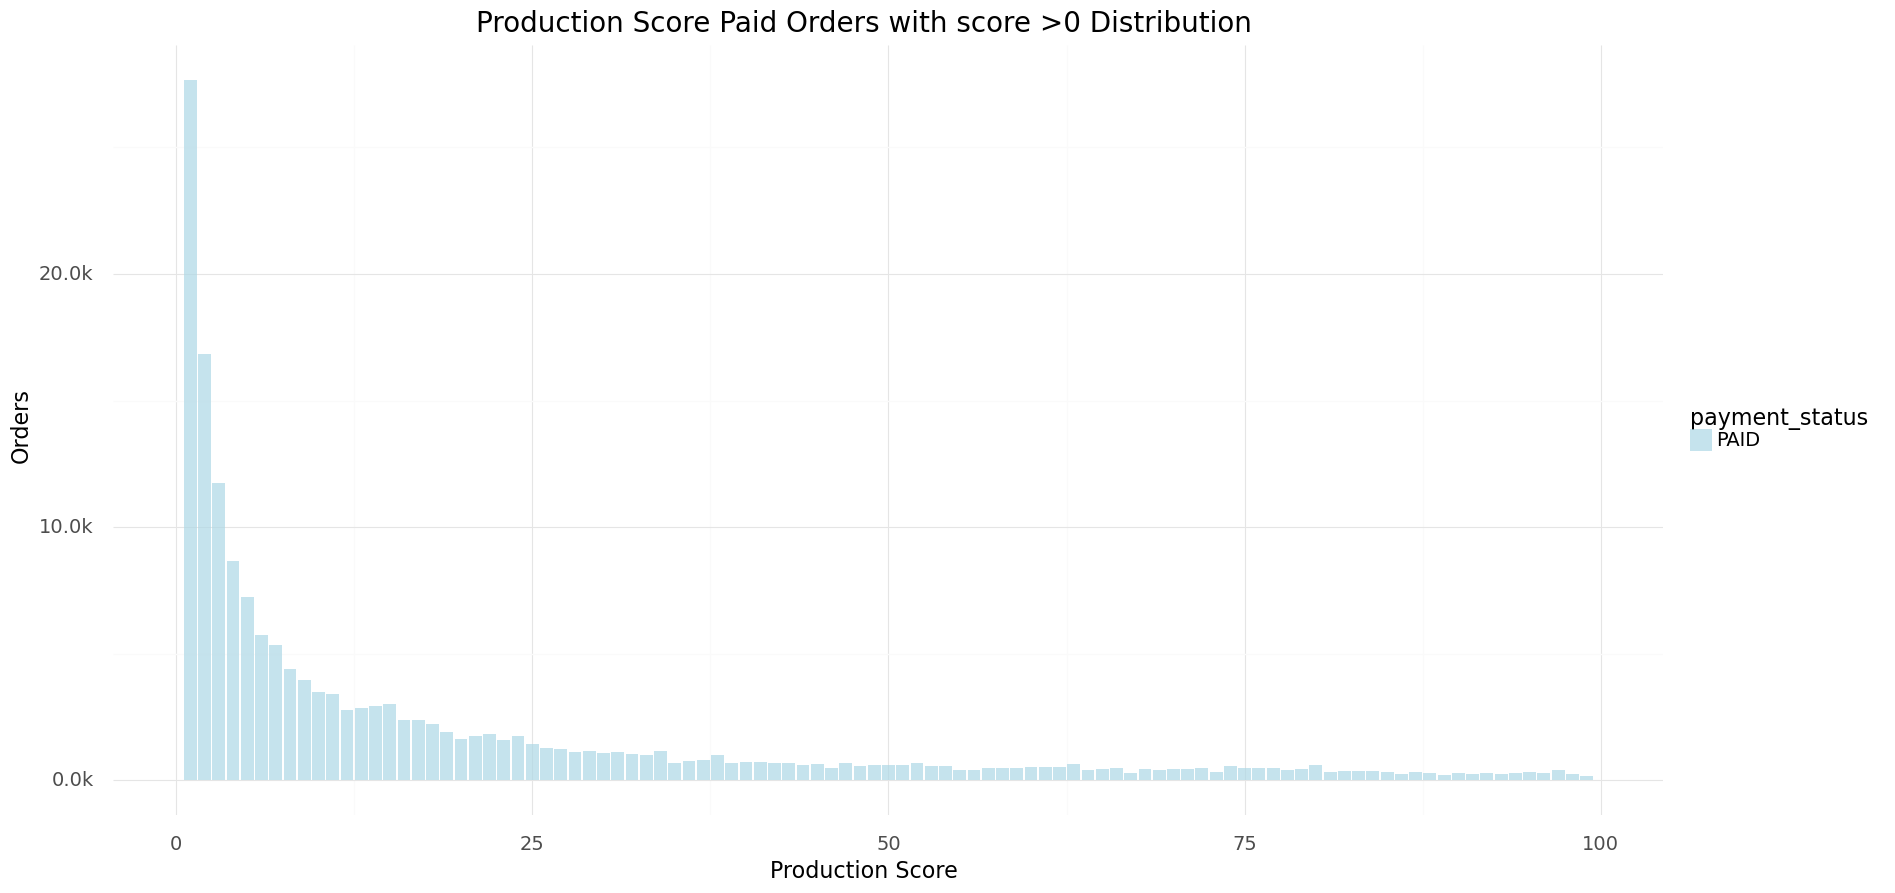

<ggplot: (399432489)>

In [31]:
(pn.ggplot(production_score.query('payment_status=="PAID" & production_score>0').reset_index(drop=True)) +
    pn.geom_bar(pn.aes(x='production_score', y='counts', fill="payment_status"), stat="identity", alpha=0.7) +
    pn.scale_fill_manual(values={"PAID": "lightblue"}) + 
    pn.scale_y_continuous(name="Orders", labels=lambda l: ['{:.1f}k'.format(v / 1000) for v in l]
                         ) +
    pn.scale_x_continuous(name="Production Score"#,
                         # breaks=range(int(final_df['MAX_ordersCount'].min()), int(final_df['MAX_ordersCount'].max()) + 1, 1),  # Adjust the range and step as needed
                          #labels=lambda l: ['{:.0f}'.format(v) for v in l]  # Optional formatting for x-axis labels
    ) +
    pn.theme_minimal() +
    pn.labs(title="Production Score Paid Orders with score >0 Distribution")+
    pn.theme(figure_size=(20, 10),  # Adjust figure size as needed
         # Adjusting title and labels size
          title=pn.element_text(size=20),  # Adjust title size
          axis_title=pn.element_text(size=16),  # Adjust axis titles size
          axis_text=pn.element_text(size=14),  # Adjust axis labels size
         # Adjusting legend title and text size
          legend_title=pn.element_text(size=16),  # Adjust legend title size
          legend_text=pn.element_text(size=14))  # Adjust legend text size
)

# Shadowing Score distribution

In [32]:
shadowing_score=no_dup_df.groupby(
        ['shadowing_score','payment_status'],
        as_index=False
    ).agg(
        counts=('shadowing_score', 'count')
    ).reset_index()

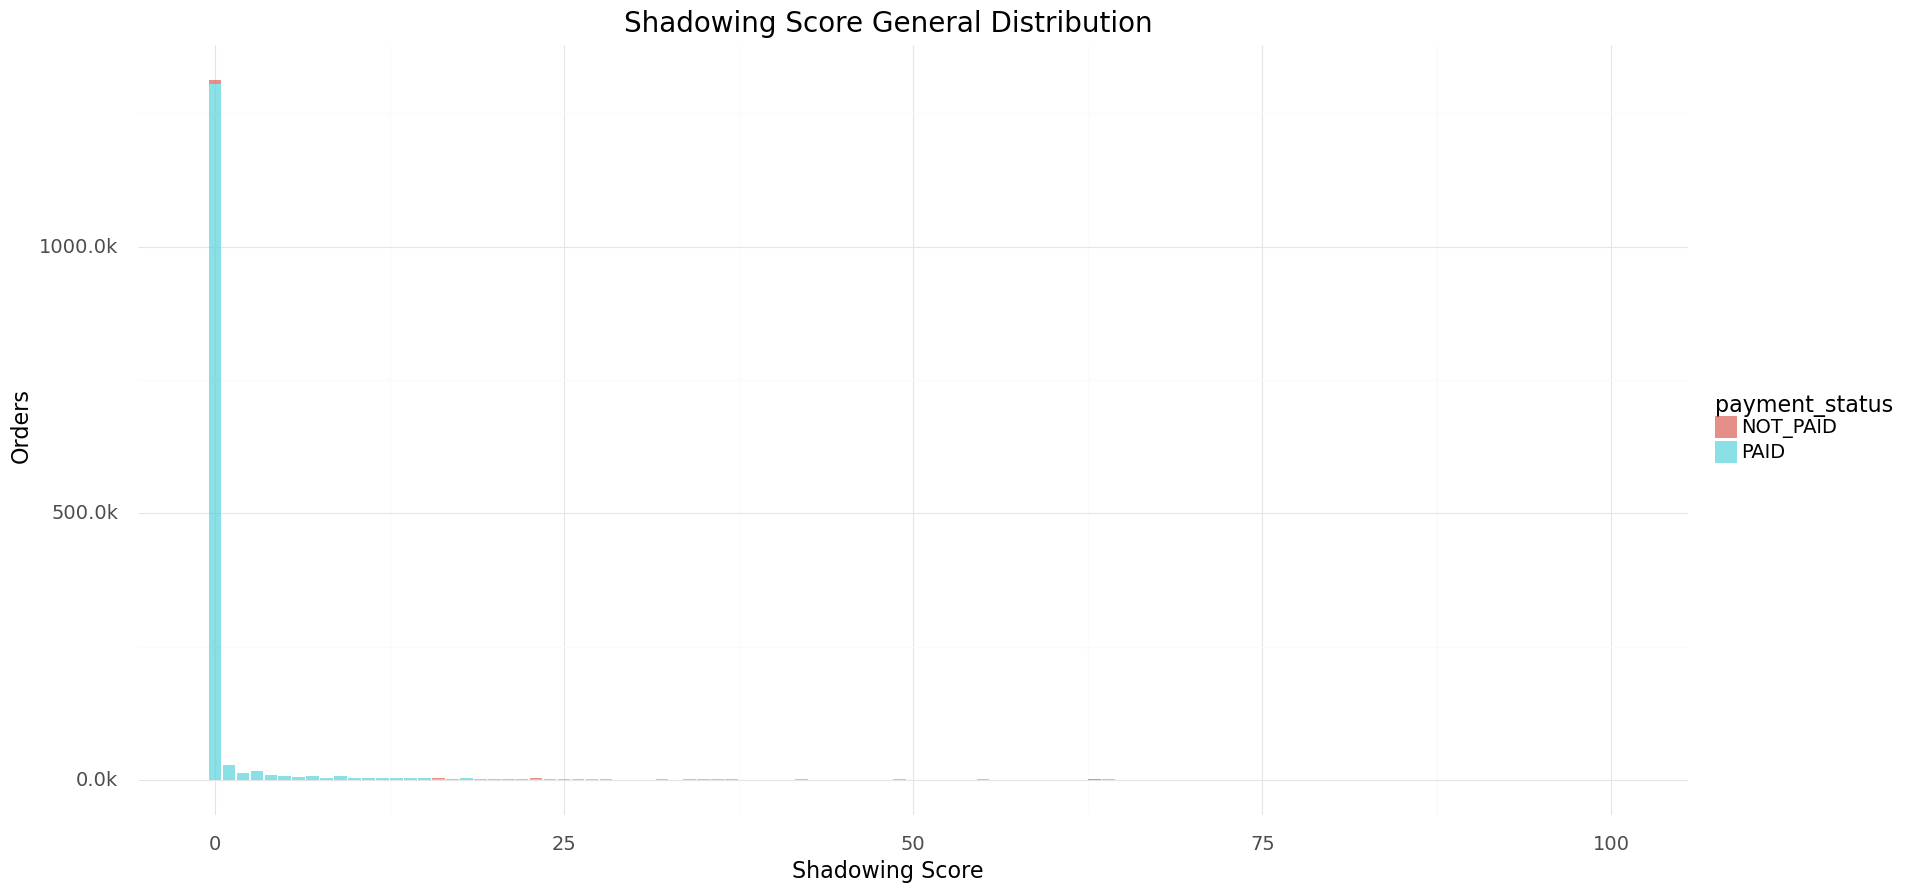

<ggplot: (399449853)>

In [33]:
(pn.ggplot(shadowing_score) +
    pn.geom_bar(pn.aes(x='shadowing_score', y='counts', fill="payment_status"), stat="identity", alpha=0.7) +
    pn.scale_y_continuous(name="Orders", labels=lambda l: ['{:.1f}k'.format(v / 1000) for v in l]) +
    pn.scale_x_continuous(name="Shadowing Score"#,
                         # breaks=range(int(final_df['MAX_ordersCount'].min()), int(final_df['MAX_ordersCount'].max()) + 1, 1),  # Adjust the range and step as needed
                          #labels=lambda l: ['{:.0f}'.format(v) for v in l]  # Optional formatting for x-axis labels
    ) +
    pn.theme_minimal() +
    pn.labs(title="Shadowing Score General Distribution")+
    pn.theme(figure_size=(20, 10),  # Adjust figure size as needed
         # Adjusting title and labels size
          title=pn.element_text(size=20),  # Adjust title size
          axis_title=pn.element_text(size=16),  # Adjust axis titles size
          axis_text=pn.element_text(size=14),  # Adjust axis labels size
         # Adjusting legend title and text size
          legend_title=pn.element_text(size=16),  # Adjust legend title size
          legend_text=pn.element_text(size=14))  # Adjust legend text size
)

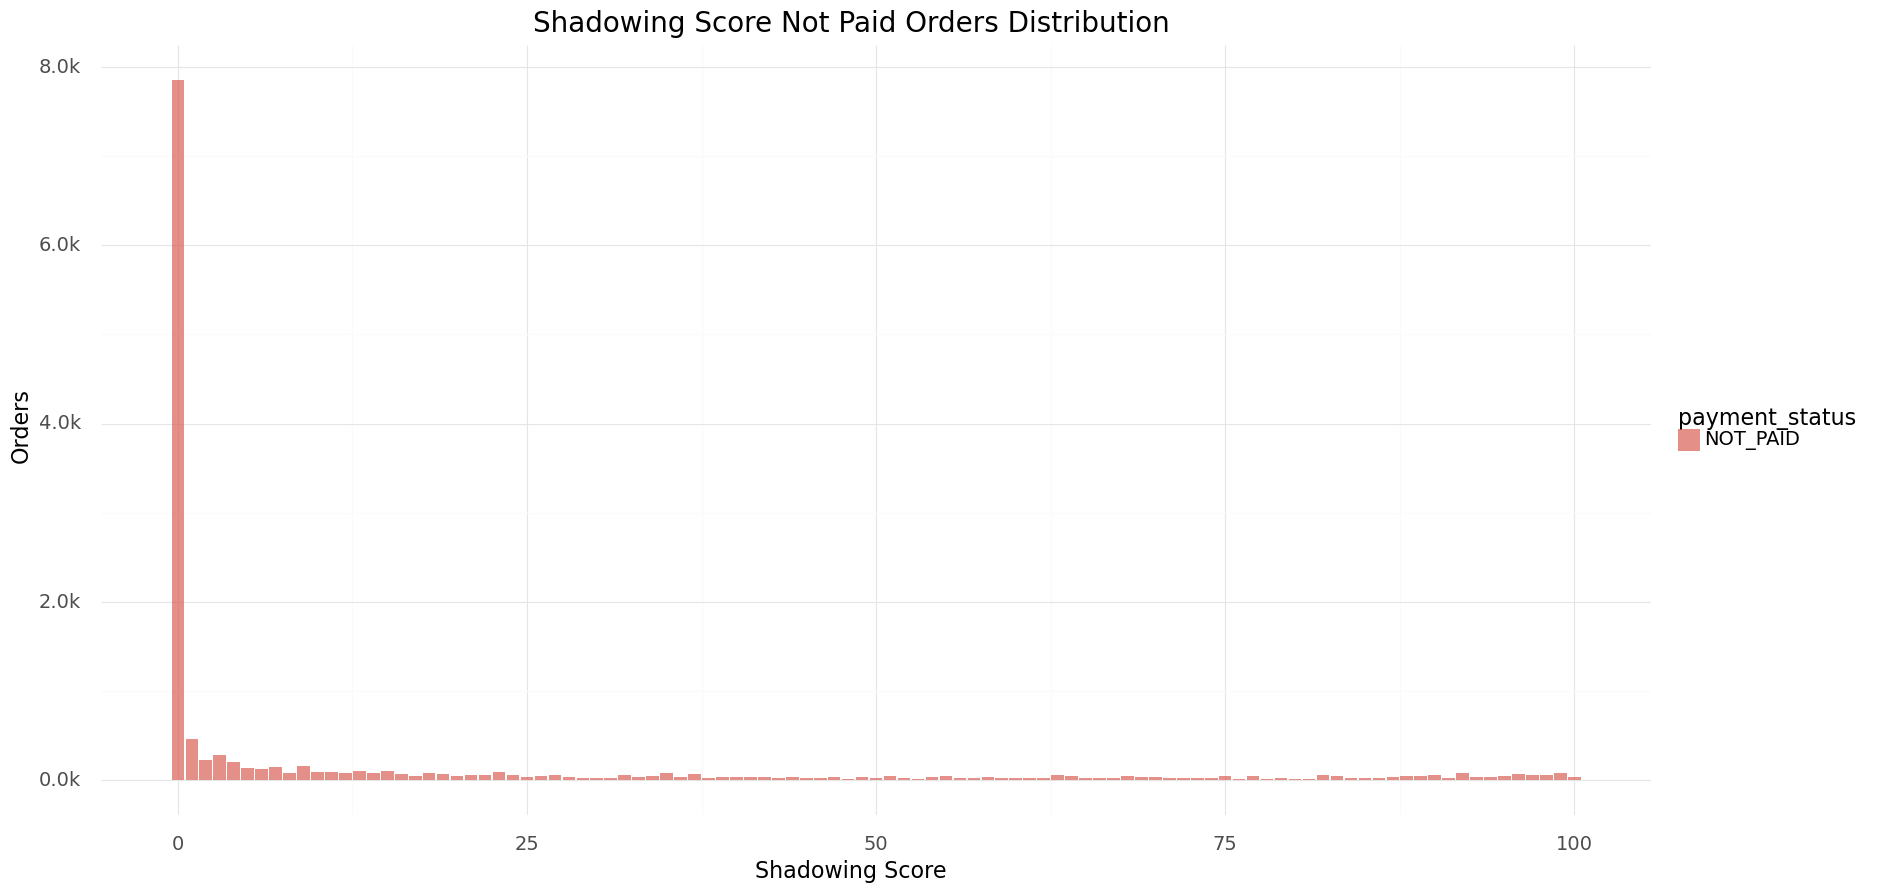

<ggplot: (724610505)>

In [34]:
(pn.ggplot(shadowing_score.query('payment_status=="NOT_PAID"').reset_index(drop=True)) +
    pn.geom_bar(pn.aes(x='shadowing_score', y='counts', fill="payment_status"), stat="identity", alpha=0.7) +
    pn.scale_y_continuous(name="Orders", labels=lambda l: ['{:.1f}k'.format(v / 1000) for v in l]) +
    pn.scale_x_continuous(name="Shadowing Score"#,
                         # breaks=range(int(final_df['MAX_ordersCount'].min()), int(final_df['MAX_ordersCount'].max()) + 1, 1),  # Adjust the range and step as needed
                          #labels=lambda l: ['{:.0f}'.format(v) for v in l]  # Optional formatting for x-axis labels
    ) +
    pn.theme_minimal() +
    pn.labs(title="Shadowing Score Not Paid Orders Distribution")+
    pn.theme(figure_size=(20, 10),  # Adjust figure size as needed
         # Adjusting title and labels size
          title=pn.element_text(size=20),  # Adjust title size
          axis_title=pn.element_text(size=16),  # Adjust axis titles size
          axis_text=pn.element_text(size=14),  # Adjust axis labels size
         # Adjusting legend title and text size
          legend_title=pn.element_text(size=16),  # Adjust legend title size
          legend_text=pn.element_text(size=14))  # Adjust legend text size
)

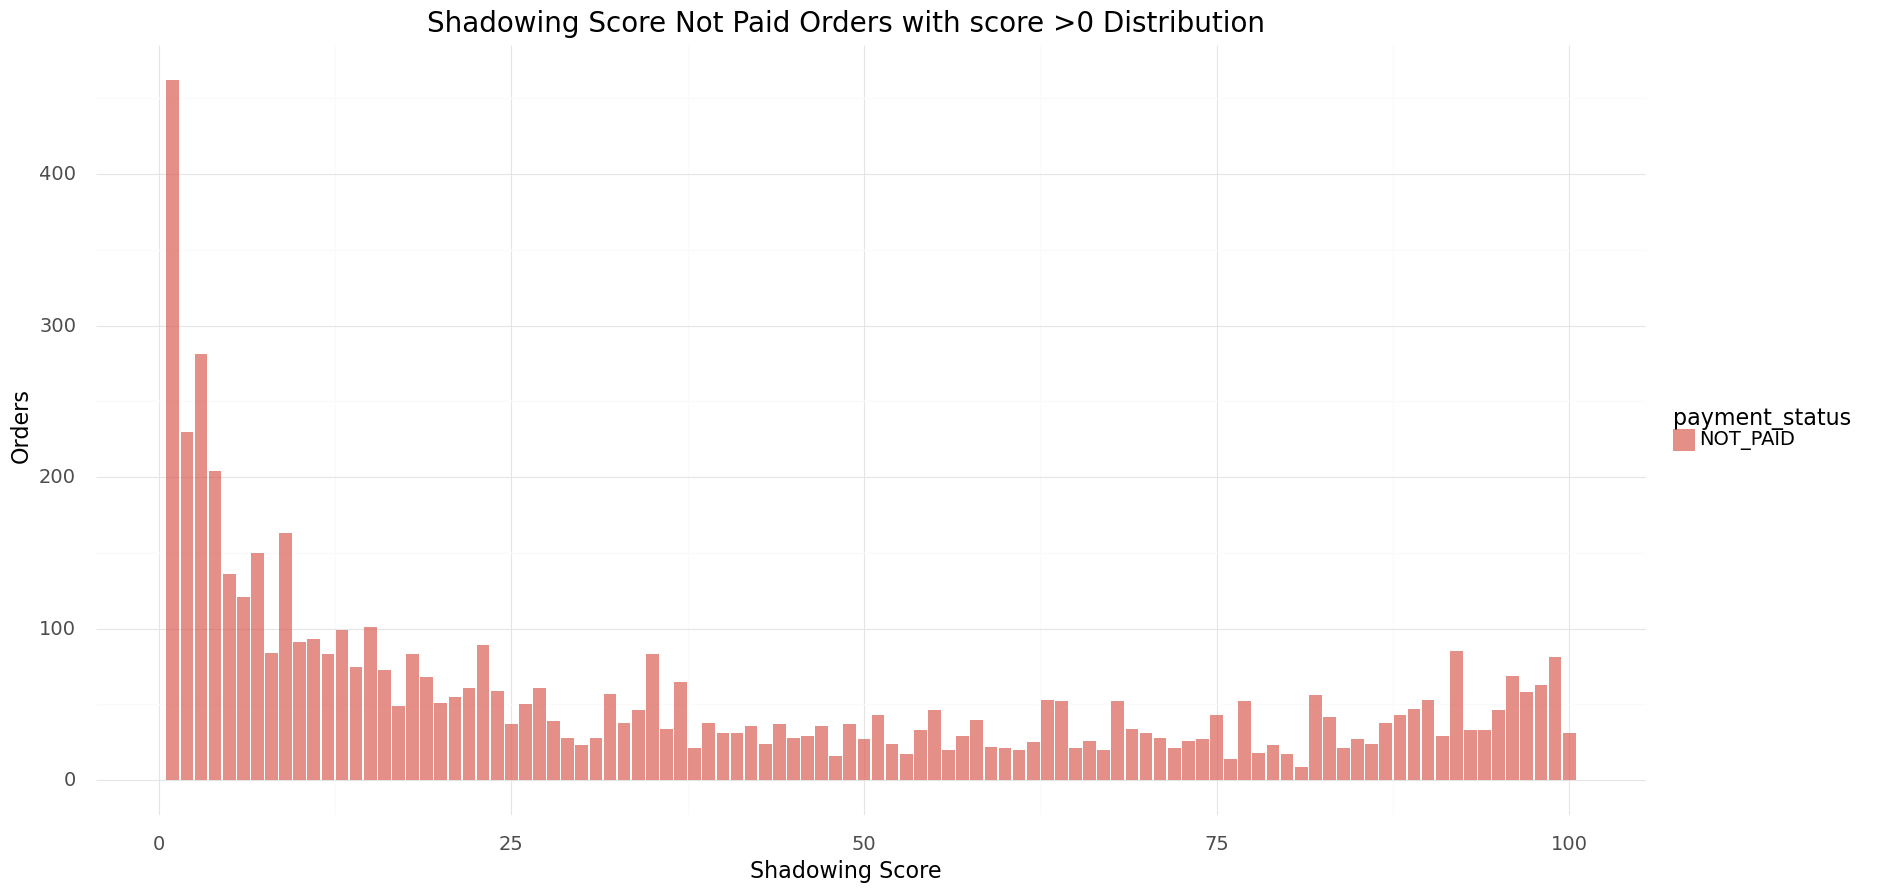

<ggplot: (399465725)>

In [35]:
(pn.ggplot(shadowing_score.query('payment_status=="NOT_PAID" & shadowing_score>0').reset_index(drop=True)) +
    pn.geom_bar(pn.aes(x='shadowing_score', y='counts', fill="payment_status"), stat="identity", alpha=0.7) +
    pn.scale_y_continuous(name="Orders"#, labels=lambda l: ['{:.1f}k'.format(v / 1000) for v in l]
                         ) +
    pn.scale_x_continuous(name="Shadowing Score"#,
                         # breaks=range(int(final_df['MAX_ordersCount'].min()), int(final_df['MAX_ordersCount'].max()) + 1, 1),  # Adjust the range and step as needed
                          #labels=lambda l: ['{:.0f}'.format(v) for v in l]  # Optional formatting for x-axis labels
    ) +
    pn.theme_minimal() +
    pn.labs(title="Shadowing Score Not Paid Orders with score >0 Distribution")+
    pn.theme(figure_size=(20, 10),  # Adjust figure size as needed
         # Adjusting title and labels size
          title=pn.element_text(size=20),  # Adjust title size
          axis_title=pn.element_text(size=16),  # Adjust axis titles size
          axis_text=pn.element_text(size=14),  # Adjust axis labels size
         # Adjusting legend title and text size
          legend_title=pn.element_text(size=16),  # Adjust legend title size
          legend_text=pn.element_text(size=14))  # Adjust legend text size
)

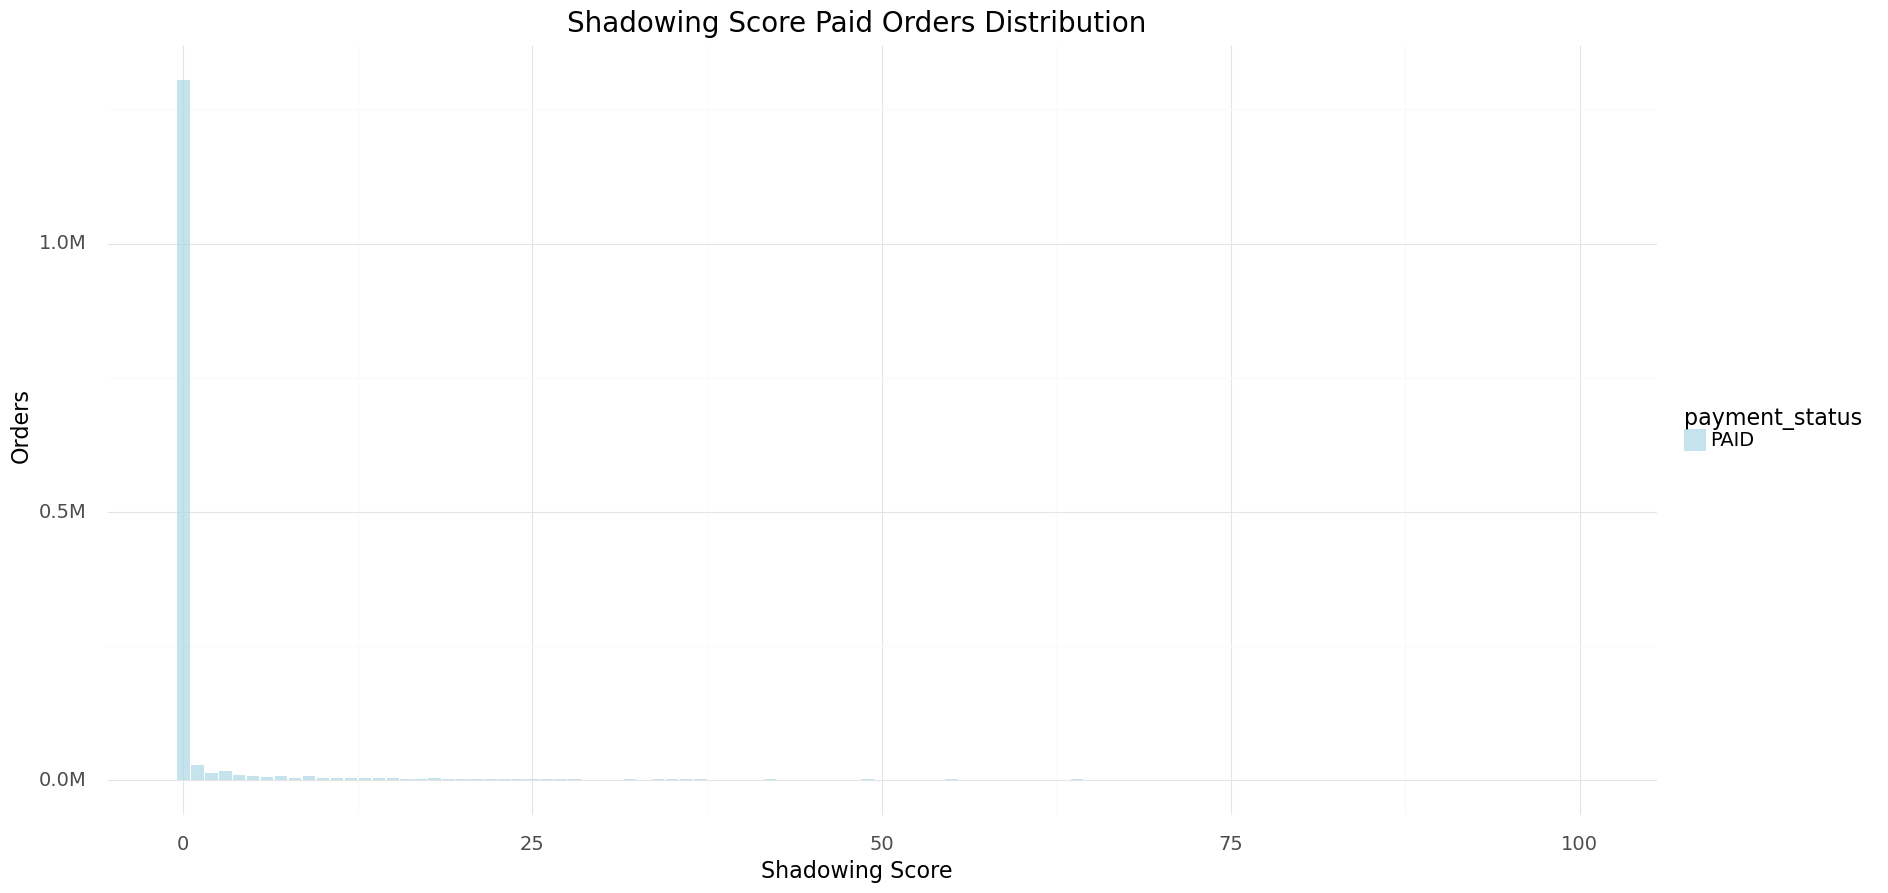

<ggplot: (399572929)>

In [36]:
(pn.ggplot(shadowing_score.query('payment_status=="PAID"').reset_index(drop=True)) +
    pn.geom_bar(pn.aes(x='shadowing_score', y='counts', fill="payment_status"), stat="identity", alpha=0.7) +
    pn.scale_y_continuous(name="Orders", labels=lambda l: ['{:.1f}M'.format(v / 1000000) for v in l]) +
    pn.scale_fill_manual(values={"PAID": "lightblue"}) + 
    pn.scale_x_continuous(name="Shadowing Score"#,
                         # breaks=range(int(final_df['MAX_ordersCount'].min()), int(final_df['MAX_ordersCount'].max()) + 1, 1),  # Adjust the range and step as needed
                          #labels=lambda l: ['{:.0f}'.format(v) for v in l]  # Optional formatting for x-axis labels
    ) +
    pn.theme_minimal() +
    pn.labs(title="Shadowing Score Paid Orders Distribution")+
    pn.theme(figure_size=(20, 10),  # Adjust figure size as needed
         # Adjusting title and labels size
          title=pn.element_text(size=20),  # Adjust title size
          axis_title=pn.element_text(size=16),  # Adjust axis titles size
          axis_text=pn.element_text(size=14),  # Adjust axis labels size
         # Adjusting legend title and text size
          legend_title=pn.element_text(size=16),  # Adjust legend title size
          legend_text=pn.element_text(size=14))  # Adjust legend text size
)

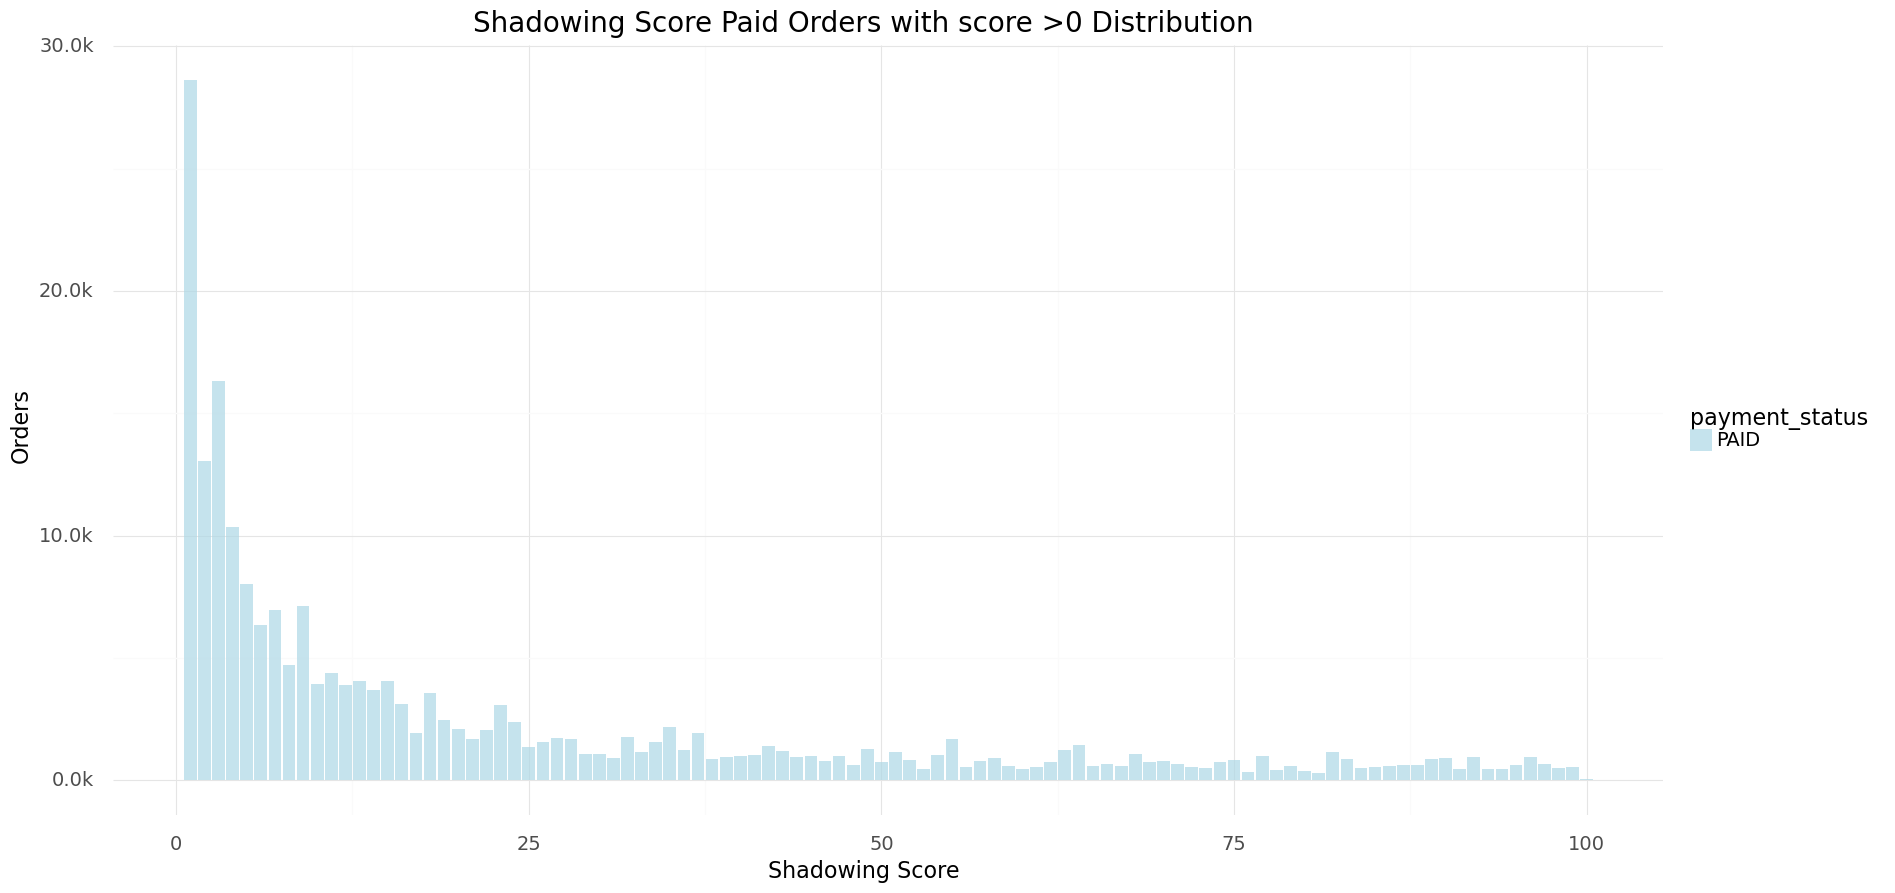

<ggplot: (399565077)>

In [37]:
(pn.ggplot(shadowing_score.query('payment_status=="PAID" & shadowing_score>0').reset_index(drop=True)) +
    pn.geom_bar(pn.aes(x='shadowing_score', y='counts', fill="payment_status"), stat="identity", alpha=0.7) +
    pn.scale_fill_manual(values={"PAID": "lightblue"}) + 
    pn.scale_y_continuous(name="Orders", labels=lambda l: ['{:.1f}k'.format(v / 1000) for v in l]
                         ) +
    pn.scale_x_continuous(name="Shadowing Score"#,
                         # breaks=range(int(final_df['MAX_ordersCount'].min()), int(final_df['MAX_ordersCount'].max()) + 1, 1),  # Adjust the range and step as needed
                          #labels=lambda l: ['{:.0f}'.format(v) for v in l]  # Optional formatting for x-axis labels
    ) +
    pn.theme_minimal() +
    pn.labs(title="Shadowing Score Paid Orders with score >0 Distribution")+
    pn.theme(figure_size=(20, 10),  # Adjust figure size as needed
         # Adjusting title and labels size
          title=pn.element_text(size=20),  # Adjust title size
          axis_title=pn.element_text(size=16),  # Adjust axis titles size
          axis_text=pn.element_text(size=14),  # Adjust axis labels size
         # Adjusting legend title and text size
          legend_title=pn.element_text(size=16),  # Adjust legend title size
          legend_text=pn.element_text(size=14))  # Adjust legend text size
)

In [44]:
# Production Score

df_production_score=pd.DataFrame(no_dup_df['production_score'].value_counts()/len(no_dup_df))
df_production_score = df_production_score.reset_index()
df_production_score.columns=['production_score','percentage']
df_production_score

,production_score,percentage
0,0,0.886319
1,1,0.018362
2,2,0.011198
3,3,0.007833
4,4,0.005769
...,...,...
95,98,0.000177
96,86,0.000172
97,93,0.000168
98,89,0.000149


In [45]:
# Shadowing Score

df_shadowing_score=pd.DataFrame(no_dup_df['shadowing_score'].value_counts()/len(no_dup_df))
df_shadowing_score = df_shadowing_score.reset_index()
df_shadowing_score.columns=['shadowing_score','percentage']
df_shadowing_score

,shadowing_score,percentage
0,0,0.856022
1,1,0.018970
2,3,0.010822
3,2,0.008660
4,4,0.006884
...,...,...
96,78,0.000271
97,80,0.000266
98,76,0.000221
99,81,0.000185


In [46]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

display_side_by_side(df_production_score,df_shadowing_score, titles=['Production Score','Shadowing Score'])

,production_score,percentage
0,0,0.886319
1,1,0.018362
2,2,0.011198
3,3,0.007833
4,4,0.005769
5,5,0.004835
6,6,0.003831
7,7,0.003555
8,8,0.002943
9,9,0.002640


# Adding customer type

In [50]:
no_dup_df['customer_type']=no_dup_df['customer_orderscount'].apply(lambda x: 'NC' if x == 0 else 'EC')
no_dup_df['unpaid']=no_dup_df['payment_status'].apply(lambda x: 1 if x == 'NOT_PAID' else 0)

# Crosstab

In [42]:
# Ground truth, the user has a successful verification and at least 1 order is a trusted user, in case not a bot.
pd.crosstab(
    no_dup_df['customer_type'],
    no_dup_df['payment_status'],
    dropna=False,
    normalize='all'
)

payment_status,NOT_PAID,PAID
customer_type,,
EC,0.007148,0.921406
NC,0.001709,0.069736


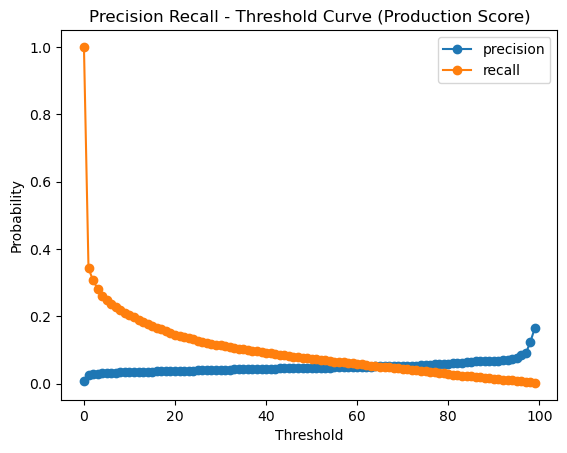

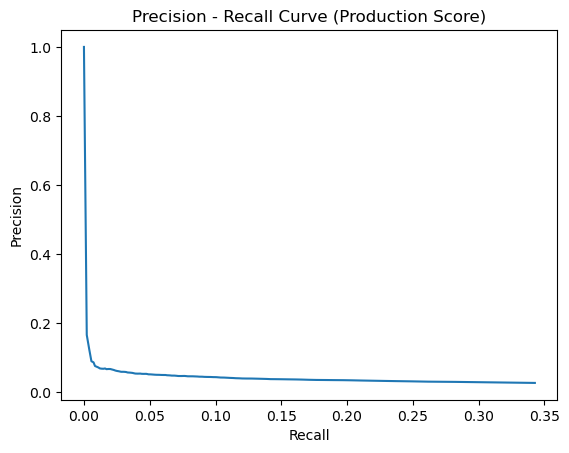

In [52]:
# Here we are looking for the precision and recall of the oposite case. 
# Case of how good is production model for detecting unpaid cash being 1 the positive label.
prec_1, recall_1, thresholds_1 = precision_recall_curve(no_dup_df['unpaid'].values, no_dup_df['production_score'].values, pos_label=1)

plt.plot(thresholds_1[:], prec_1[:-1], label='precision', marker='o')
plt.plot(thresholds_1[:], recall_1[:-1], label='recall', marker='o')
plt.legend()
plt.title("Precision Recall - Threshold Curve (Production Score)")
plt.ylabel("Probability")
plt.xlabel("Threshold")



plt.figure()

plt.plot(recall_1[1:], prec_1[1:])
plt.title("Precision - Recall Curve (Production Score)")
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.show()

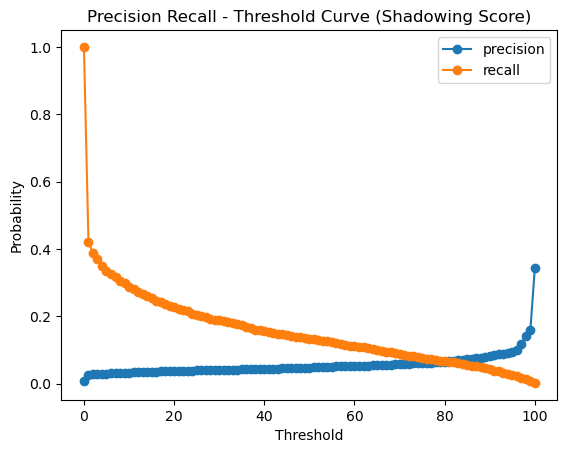

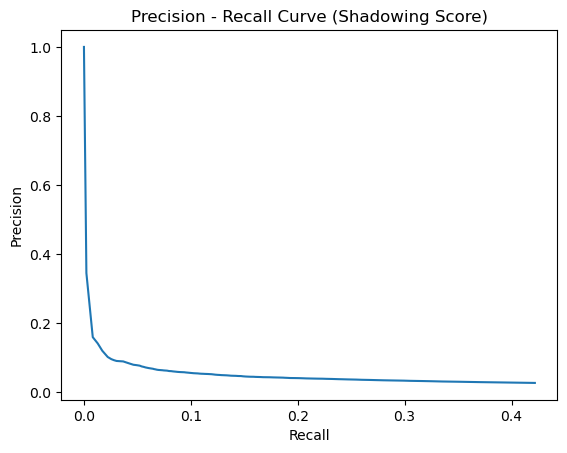

In [54]:
# Here we are looking for the precision and recall of the oposite case. 
# Case of how good is shadowing model for detecting unpaid cash being 1 the positive label.
prec_2, recall_2, thresholds_2 = precision_recall_curve(no_dup_df['unpaid'].values, no_dup_df['shadowing_score'].values, pos_label=1)

plt.plot(thresholds_2[:], prec_2[:-1], label='precision', marker='o')
plt.plot(thresholds_2[:], recall_2[:-1], label='recall', marker='o')
plt.legend()
plt.title("Precision Recall - Threshold Curve (Shadowing Score)")
plt.ylabel("Probability")
plt.xlabel("Threshold")



plt.figure()

plt.plot(recall_2[1:], prec_2[1:])
plt.title("Precision - Recall Curve (Shadowing Score)")
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.show()

In [55]:
# Convert payment_status to binary where NOT_PAID is 1 and PAID is 0
no_dup_df['true_label'] = no_dup_df['unpaid']

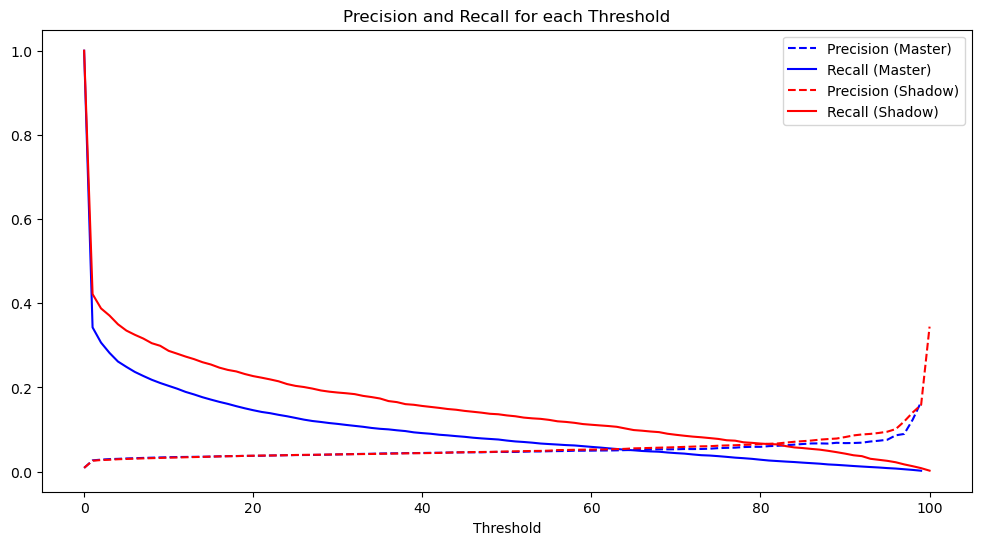

In [56]:
# Calculate precision, recall, and thresholds for each model
precision_master, recall_master, thresholds_master = precision_recall_curve(no_dup_df['true_label'], no_dup_df['production_score'])
precision_shadow, recall_shadow, thresholds_shadow = precision_recall_curve(no_dup_df['true_label'], no_dup_df['shadowing_score'])

# Plot precision and recall against the threshold for each model
plt.figure(figsize=(12, 6))

plt.plot(thresholds_master, precision_master[:-1], 'b--', label='Precision (Master)')
plt.plot(thresholds_master, recall_master[:-1], 'b-', label='Recall (Master)')
plt.plot(thresholds_shadow, precision_shadow[:-1], 'r--', label='Precision (Shadow)')
plt.plot(thresholds_shadow, recall_shadow[:-1], 'r-', label='Recall (Shadow)')
plt.xlabel('Threshold')
plt.title('Precision and Recall for each Threshold')
plt.legend()

plt.show()

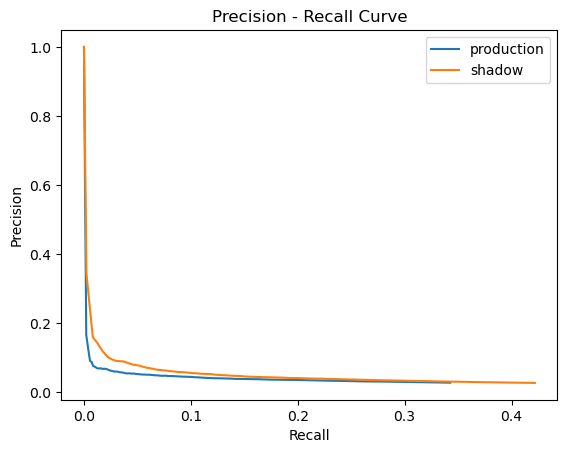

In [58]:
plt.plot(recall_1[1:], prec_1[1:], label="production")
plt.plot(recall_2[1:], prec_2[1:], label="shadow")
plt.title("Precision - Recall Curve")
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.legend()  # This line will display the labels
plt.show()

In [ ]:
plot_precision_recall()

<Figure size 800x500 with 0 Axes>

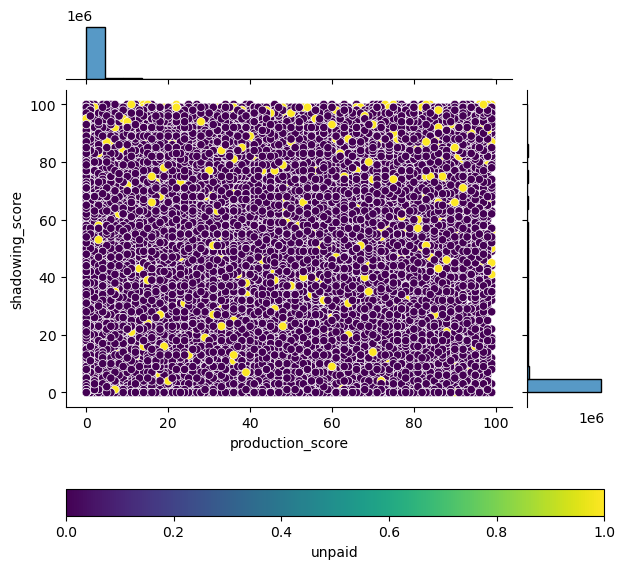

In [59]:
def plot_analytics(simplier_df,x,y,z,figsize=(8, 5)):
    simplier_df[x] = simplier_df[x].fillna(0).astype(float)
    simplier_df[y] = simplier_df[y].fillna(0).astype(float)
    simplier_df[z] = simplier_df[z].fillna(0).astype(float)

    plt.figure(num=1, figsize=figsize)
    g = sns.jointplot(x=simplier_df[x].values, y=simplier_df[y].values, c=simplier_df[z].values, joint_kws={"color":None, 'cmap':'viridis'})
    g.fig.colorbar(g.ax_joint.collections[0], ax=[g.ax_joint, g.ax_marg_y, g.ax_marg_x], use_gridspec=True, orientation='horizontal',label=z)
    g.set_axis_labels(xlabel=x, ylabel=y)
    plt.show()
    
plot_analytics(no_dup_df,"production_score","shadowing_score","unpaid",figsize=(8, 5))

Thresholds: [inf 99. 98. 97. 96. 95. 94. 93. 92. 91. 90. 89. 88. 87. 86. 85. 84. 83.
 82. 81. 80. 79. 78. 77. 76. 75. 74. 73. 72. 71. 70. 69. 68. 67. 66. 65.
 64. 63. 62. 61. 60. 59. 58. 57. 56. 55. 54. 53. 52. 51. 50. 49. 48. 47.
 46. 45. 44. 43. 42. 41. 40. 39. 38. 37. 36. 35. 34. 33. 32. 31. 30. 29.
 28. 27. 26. 25. 24. 23. 22. 21. 20. 19. 18. 17. 16. 15. 14. 13. 12. 11.
 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.  0.]


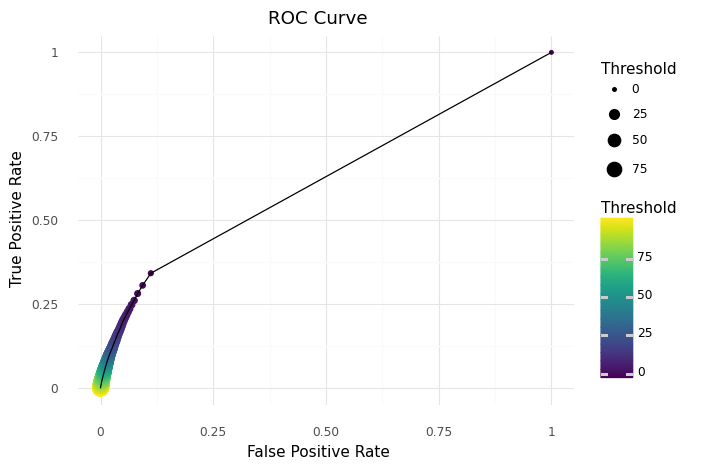

<ggplot: (710497989)>

In [67]:
plot_roc_curve(no_dup_df, preds_col='production_score', label_col='unpaid')

Thresholds: [ inf 100.  99.  98.  97.  96.  95.  94.  93.  92.  91.  90.  89.  88.
  87.  86.  85.  84.  83.  82.  81.  80.  79.  78.  77.  76.  75.  74.
  73.  72.  71.  70.  69.  68.  67.  66.  65.  64.  63.  62.  61.  60.
  59.  58.  57.  56.  55.  54.  53.  52.  51.  50.  49.  48.  47.  46.
  45.  44.  43.  42.  41.  40.  39.  38.  37.  36.  35.  34.  33.  32.
  31.  30.  29.  28.  27.  26.  25.  24.  23.  22.  21.  20.  19.  18.
  17.  16.  15.  14.  13.  12.  11.  10.   9.   8.   7.   6.   5.   4.
   3.   2.   1.   0.]


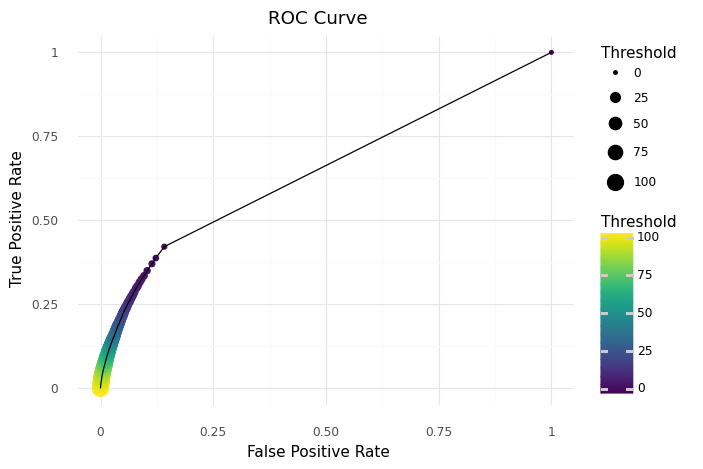

<ggplot: (683762221)>

In [68]:
plot_roc_curve(no_dup_df, preds_col='shadowing_score', label_col='unpaid')

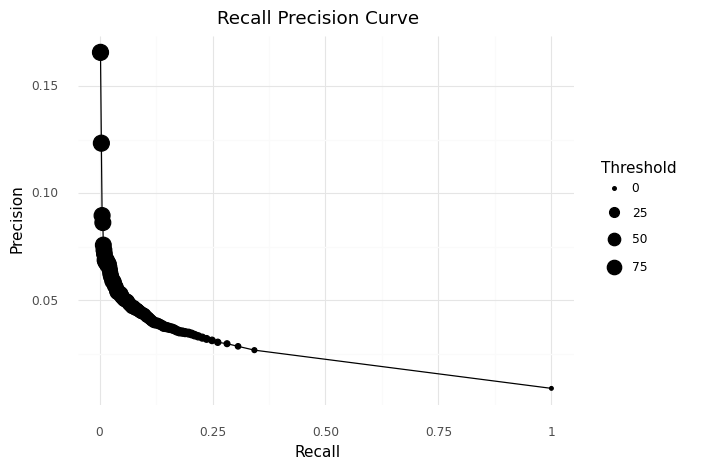

<ggplot: (683619141)>

In [63]:
plot_precision_recall(no_dup_df, preds_col='production_score', label_col='unpaid')

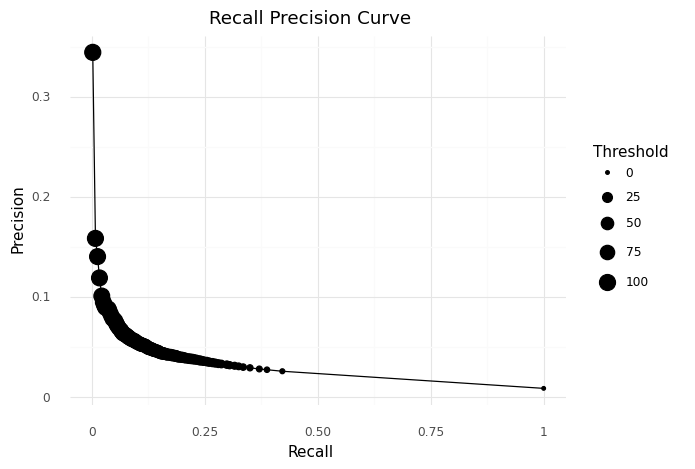

<ggplot: (683626441)>

In [64]:
plot_precision_recall(no_dup_df, preds_col='shadowing_score', label_col='unpaid')